In [7]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.8
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.8_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.8.csv", delimiter=" ")

print(menor.shape)

(4525, 4)


In [8]:
def get_array(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)/5),5)
    return erro_array

def get_array2(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),10)
    return erro_array

def get_errors(e0,e1,e2,e3,e4,e5,e6,e7,e8,e9):
    
    mae=[np.sum(np.abs(e0),axis=0)[2]/e0.shape[0],np.sum(np.abs(e1),axis=0)[2]/e1.shape[0],np.sum(np.abs(e2),axis=0)[2]/e2.shape[0],
       np.sum(np.abs(e3),axis=0)[2]/e3.shape[0],np.sum(np.abs(e4),axis=0)[2]/e4.shape[0],np.sum(np.abs(e5),axis=0)[2]/e5.shape[0],
       np.sum(np.abs(e6),axis=0)[2]/e6.shape[0],np.sum(np.abs(e7,),axis=0)[2]/e7.shape[0],np.sum(np.abs(e8),axis=0)[2]/e8.shape[0],
       np.sum(np.abs(e9),axis=0)[2]/e9.shape[0]]
    
    mse=[np.sum(e0**2,axis=0)[2]/e0.shape[0],np.sum(e1**2,axis=0)[2]/e1.shape[0],np.sum(e2**2,axis=0)[2]/e2.shape[0],
       np.sum(e3**2,axis=0)[2]/e3.shape[0],np.sum(e4**2,axis=0)[2]/e4.shape[0],np.sum(e5**2,axis=0)[2]/e5.shape[0],
       np.sum(e6**2,axis=0)[2]/e6.shape[0],np.sum(e7**2,axis=0)[2]/e7.shape[0],np.sum(e8**2,axis=0)[2]/e8.shape[0],
       np.sum(e9**2,axis=0)[2]/e9.shape[0]]

    rmse=[np.sqrt(np.sum(e0**2,axis=0)[2]/e0.shape[0]),np.sqrt(np.sum(e1**2,axis=0)[2]/e1.shape[0]),np.sqrt(np.sum(e2**2,axis=0)[2]/e2.shape[0]),
       np.sqrt(np.sum(e3**2,axis=0)[2]/e3.shape[0]),np.sqrt(np.sum(e4**2,axis=0)[2]/e4.shape[0]),np.sqrt(np.sum(e5**2,axis=0)[2]/e5.shape[0]),
       np.sqrt(np.sum(e6**2,axis=0)[2]/e6.shape[0]),np.sqrt(np.sum(e7**2,axis=0)[2]/e7.shape[0]),np.sqrt(np.sum(e8**2,axis=0)[2]/e8.shape[0]),
       np.sqrt(np.sum(e9**2,axis=0)[2]/e9.shape[0])]
    
    return mae,mse,rmse
    

In [9]:
erro_bl0 = []
erro_bl1 = []
erro_bl2 = []
erro_bl3 = []
erro_bl4 = []
erro_bl5 = []
erro_bl6 = []
erro_bl7 = []
erro_bl8 = []
erro_bl9 = []

erro2d_bl0 = []
erro2d_bl1 = []
erro2d_bl2 = []
erro2d_bl3 = []
erro2d_bl4 = []
erro2d_bl5 = []
erro2d_bl6 = []
erro2d_bl7 = []
erro2d_bl8 = []
erro2d_bl9 = []

erro3d_bl0 = []
erro3d_bl1 = []
erro3d_bl2 = []
erro3d_bl3 = []
erro3d_bl4 = []
erro3d_bl5 = []
erro3d_bl6 = []
erro3d_bl7 = []
erro3d_bl8 = []
erro3d_bl9 = []

erro4d_bl0 = []
erro4d_bl1 = []
erro4d_bl2 = []
erro4d_bl3 = []
erro4d_bl4 = []
erro4d_bl5 = []
erro4d_bl6 = []
erro4d_bl7 = []
erro4d_bl8 = []
erro4d_bl9 = []

MAE = []
MSE = []
RMSE = []
MAE2D = []
MSE2D = []
RMSE2D = []
MAE3D = []
MSE3D = []
RMSE3D = []
MAE4D = []
MSE4D = []
RMSE4D = []


for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    
    
    cont = np.zeros((10))
    for ii in range(future):
        
        if data[trainlen+ii] < 0.1:
            erro_bl0.append(prediction[ii][0])
            erro_bl0.append(data[trainlen+ii])
            erro_bl0.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl0.append(i)
            erro_bl0.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl0.append(prediction[ii][0])
                erro2d_bl0.append(data[trainlen+ii])
                erro2d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl0.append(i)
                erro2d_bl0.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl0.append(prediction[ii][0])
                erro3d_bl0.append(data[trainlen+ii])
                erro3d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl0.append(i)
                erro3d_bl0.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl0.append(prediction[ii][0])
                erro4d_bl0.append(data[trainlen+ii])
                erro4d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl0.append(i)
                erro4d_bl0.append(ii)
            cont[0]+=1
        elif data[trainlen+ii] < 0.2:
            erro_bl1.append(prediction[ii][0])
            erro_bl1.append(data[trainlen+ii])
            erro_bl1.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl1.append(i)
            erro_bl1.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl1.append(prediction[ii][0])
                erro2d_bl1.append(data[trainlen+ii])
                erro2d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl1.append(i)
                erro2d_bl1.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl1.append(prediction[ii][0])
                erro3d_bl1.append(data[trainlen+ii])
                erro3d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl1.append(i)
                erro3d_bl1.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl1.append(prediction[ii][0])
                erro4d_bl1.append(data[trainlen+ii])
                erro4d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl1.append(i)
                erro4d_bl1.append(ii)
            cont[1]+=1
        elif data[trainlen+ii] < 0.3:
            erro_bl2.append(prediction[ii][0])
            erro_bl2.append(data[trainlen+ii])
            erro_bl2.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl2.append(i)
            erro_bl2.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl2.append(prediction[ii][0])
                erro2d_bl2.append(data[trainlen+ii])
                erro2d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl2.append(i)
                erro2d_bl2.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl2.append(prediction[ii][0])
                erro3d_bl2.append(data[trainlen+ii])
                erro3d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl2.append(i)
                erro3d_bl2.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl2.append(prediction[ii][0])
                erro4d_bl2.append(data[trainlen+ii])
                erro4d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl2.append(i)
                erro4d_bl2.append(ii)
            cont[2]+=1
        elif data[trainlen+ii] < 0.4:
            erro_bl3.append(prediction[ii][0])
            erro_bl3.append(data[trainlen+ii])
            erro_bl3.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl3.append(i)
            erro_bl3.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl3.append(prediction[ii][0])
                erro2d_bl3.append(data[trainlen+ii])
                erro2d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl3.append(i)
                erro2d_bl3.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl3.append(prediction[ii][0])
                erro3d_bl3.append(data[trainlen+ii])
                erro3d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl3.append(i)
                erro3d_bl3.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl3.append(prediction[ii][0])
                erro4d_bl3.append(data[trainlen+ii])
                erro4d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl3.append(i)
                erro4d_bl3.append(ii)
            cont[3]+=1
        elif data[trainlen+ii] < 0.5:
            erro_bl4.append(prediction[ii][0])
            erro_bl4.append(data[trainlen+ii])
            erro_bl4.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl4.append(i)
            erro_bl4.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl4.append(prediction[ii][0])
                erro2d_bl4.append(data[trainlen+ii])
                erro2d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl4.append(i)
                erro2d_bl4.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl4.append(prediction[ii][0])
                erro3d_bl4.append(data[trainlen+ii])
                erro3d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl4.append(i)
                erro3d_bl4.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl4.append(prediction[ii][0])
                erro4d_bl4.append(data[trainlen+ii])
                erro4d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl4.append(i)
                erro4d_bl4.append(ii)
            cont[4]+=1
        elif data[trainlen+ii] < 0.6:
            erro_bl5.append(prediction[ii][0])
            erro_bl5.append(data[trainlen+ii])
            erro_bl5.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl5.append(i)
            erro_bl5.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl5.append(prediction[ii][0])
                erro2d_bl5.append(data[trainlen+ii])
                erro2d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl5.append(i)
                erro2d_bl5.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl5.append(prediction[ii][0])
                erro3d_bl5.append(data[trainlen+ii])
                erro3d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl5.append(i)
                erro3d_bl5.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl5.append(prediction[ii][0])
                erro4d_bl5.append(data[trainlen+ii])
                erro4d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl5.append(i)
                erro4d_bl5.append(ii)
            cont[5]+=1
        elif data[trainlen+ii] < 0.7:
            erro_bl6.append(prediction[ii][0])
            erro_bl6.append(data[trainlen+ii])
            erro_bl6.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl6.append(i)
            erro_bl6.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl6.append(prediction[ii][0])
                erro2d_bl6.append(data[trainlen+ii])
                erro2d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl6.append(i)
                erro2d_bl6.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl6.append(prediction[ii][0])
                erro3d_bl6.append(data[trainlen+ii])
                erro3d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl6.append(i)
                erro3d_bl6.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl6.append(prediction[ii][0])
                erro4d_bl6.append(data[trainlen+ii])
                erro4d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl6.append(i)
                erro4d_bl6.append(ii)
            cont[6]+=1
        elif data[trainlen+ii] < 0.8:
            erro_bl7.append(prediction[ii][0])
            erro_bl7.append(data[trainlen+ii])
            erro_bl7.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl7.append(i)
            erro_bl7.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl7.append(prediction[ii][0])
                erro2d_bl7.append(data[trainlen+ii])
                erro2d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl7.append(i)
                erro2d_bl7.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl7.append(prediction[ii][0])
                erro3d_bl7.append(data[trainlen+ii])
                erro3d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl7.append(i)
                erro3d_bl7.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl7.append(prediction[ii][0])
                erro4d_bl7.append(data[trainlen+ii])
                erro4d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl7.append(i)
                erro4d_bl7.append(ii)
            cont[7]+=1
        elif data[trainlen+ii] < 0.9:
            erro_bl8.append(prediction[ii][0])
            erro_bl8.append(data[trainlen+ii])
            erro_bl8.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl8.append(i)
            erro_bl8.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl8.append(prediction[ii][0])
                erro2d_bl8.append(data[trainlen+ii])
                erro2d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl8.append(i)
                erro2d_bl8.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl8.append(prediction[ii][0])
                erro3d_bl8.append(data[trainlen+ii])
                erro3d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl8.append(i)
                erro3d_bl8.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl8.append(prediction[ii][0])
                erro4d_bl8.append(data[trainlen+ii])
                erro4d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl8.append(i)
                erro4d_bl8.append(ii)
            cont[8]+=1
        else:
            erro_bl9.append(prediction[ii][0])
            erro_bl9.append(data[trainlen+ii])
            erro_bl9.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl9.append(i)
            erro_bl9.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl9.append(prediction[ii][0])
                erro2d_bl9.append(data[trainlen+ii])
                erro2d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl9.append(i)
                erro2d_bl9.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl9.append(prediction[ii][0])
                erro3d_bl9.append(data[trainlen+ii])
                erro3d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl9.append(i)
                erro3d_bl9.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl9.append(prediction[ii][0])
                erro4d_bl9.append(data[trainlen+ii])
                erro4d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl9.append(i)
                erro4d_bl9.append(ii)
            cont[9]+=1
    
    mae,mse,rmse = get_errors(get_array(erro_bl0),get_array(erro_bl1),get_array(erro_bl2),get_array(erro_bl3),get_array(erro_bl4),get_array(erro_bl5),get_array(erro_bl6),get_array(erro_bl7),get_array(erro_bl8),get_array(erro_bl9))
    mae2d,mse2d,rmse2d = get_errors(get_array(erro2d_bl0),get_array(erro2d_bl1),get_array(erro2d_bl2),get_array(erro2d_bl3),get_array(erro2d_bl4),get_array(erro2d_bl5),get_array(erro2d_bl6),get_array(erro2d_bl7),get_array(erro2d_bl8),get_array(erro2d_bl9)) 
    mae3d,mse3d,rmse3d = get_errors(get_array(erro3d_bl0),get_array(erro3d_bl1),get_array(erro3d_bl2),get_array(erro3d_bl3),get_array(erro3d_bl4),get_array(erro3d_bl5),get_array(erro3d_bl6),get_array(erro3d_bl7),get_array(erro3d_bl8),get_array(erro3d_bl9))  
    mae4d,mse4d,rmse4d = get_errors(get_array(erro4d_bl0),get_array(erro4d_bl1),get_array(erro4d_bl2),get_array(erro4d_bl3),get_array(erro4d_bl4),get_array(erro4d_bl5),get_array(erro4d_bl6),get_array(erro4d_bl7),get_array(erro4d_bl8),get_array(erro4d_bl9)) 
    
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE2D.append(mae2d)
    MSE2D.append(mse2d)
    RMSE2D.append(rmse2d)
    MAE3D.append(mae3d)
    MSE3D.append(mse3d)
    RMSE3D.append(rmse3d)
    MAE4D.append(mae4d)
    MSE4D.append(mse4d)
    RMSE4D.append(rmse4d)
        
    
    mae_cp,mse_cp,rmse_cp = mae,mse,rmse
    mae2d_cp,mse2d_cp,rmse2d_cp = mae2d,mse2d,rmse2d
    mae3d_cp,mse3d_cp,rmse3d_cp = mae3d,mse3d,rmse3d
    mae4d_cp,mse4d_cp,rmse4d_cp = mae4d,mse4d,rmse4d
    
    
    
    

0 test error: 0.002329339459368289
1 test error: 0.0020192409361034233
2 test error: 0.001724113900670739


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarni

3 test error: 0.001017547664530491
4 test error: 0.0009844006314862401
5 test error: 0.0016628584824520784
6 test error: 0.0014782847868511958
7 test error: 0.0020577393093372683
8 test error: 0.0006418533236936101
9 test error: 0.0007491880188012887
10 test error: 0.0011314799690524584
11 test error: 0.001342420507284875
12 test error: 0.0010813512667579074
13 test error: 0.0012638154344720423
14 test error: 0.0008641645770077076
15 test error: 0.0017446967079615223
16 test error: 0.0006620138878705883
17 test error: 0.0011759251702575634
18 test error: 0.0009003412250511428
19 test error: 0.0009180862933849853
20 test error: 0.0013207681507108186
21 test error: 0.0014696020039202398
22 test error: 0.0004531149520644221
23 test error: 0.0006135463485325735
24 test error: 0.0008594535652540664
25 test error: 0.0005365478954008925
26 test error: 0.0009128873642725274
27 test error: 0.0013882460551245656
28 test error: 0.0008529468352991373
29 test error: 0.0011979886532192305
30 test er

223 test error: 0.0005627768936058904
224 test error: 0.001711526554422606
225 test error: 0.001083080857167998
226 test error: 0.000741333302815356
227 test error: 0.0007110211116762851
228 test error: 0.0006902311255380776
229 test error: 0.000812802793032512
230 test error: 0.0012694975740092673
231 test error: 0.0007707219092328995
232 test error: 0.0008092526708184458
233 test error: 0.0008192069902211491
234 test error: 0.0010221187570556844
235 test error: 0.0008641823253767783
236 test error: 0.0007820174154878257
237 test error: 0.0009580555898689999
238 test error: 0.0009472192576154048
239 test error: 0.0009216937472447044
240 test error: 0.0007806880155751536
241 test error: 0.001581261360838144
242 test error: 0.0011363535921184236
243 test error: 0.001559154803433554
244 test error: 0.0019650996012426218
245 test error: 0.000844131536371278
246 test error: 0.001270813371199685
247 test error: 0.0008675289333024797
248 test error: 0.0008863309810991504
249 test error: 0.00

440 test error: 0.0007965009591005231
441 test error: 0.0011221193880784175
442 test error: 0.0017226176764669162
443 test error: 0.0009851143267596875
444 test error: 0.0010060527447336494
445 test error: 0.0007287896685837762
446 test error: 0.0008380251851601351
447 test error: 0.001022597879062163
448 test error: 0.0010902591708885658
449 test error: 0.0009376249422363126
450 test error: 0.0006872683709890291
451 test error: 0.001261315224521512
452 test error: 0.0006264507345804426
453 test error: 0.0007745952148664449
454 test error: 0.0009610140267603083
455 test error: 0.0006792199646989587
456 test error: 0.001672989625809657
457 test error: 0.0013875134233404995
458 test error: 0.0007758833135068442
459 test error: 0.0010357180579401016
460 test error: 0.0014872969121466253
461 test error: 0.001127826920326859
462 test error: 0.0006602085623854636
463 test error: 0.0005726066968443491
464 test error: 0.0009353831665568524
465 test error: 0.001724968556263975
466 test error: 0

658 test error: 0.0012520222335513625
659 test error: 0.0009274370427322033
660 test error: 0.001684396422972398
661 test error: 0.0005989797815210849
662 test error: 0.0012746115086327643
663 test error: 0.0015278448582668484
664 test error: 0.001330053600795185
665 test error: 0.0010829205990750314
666 test error: 0.0006770698225527453
667 test error: 0.0006701015937792318
668 test error: 0.0022653455943407322
669 test error: 0.0005793307804269318
670 test error: 0.0011636353589849924
671 test error: 0.0009048686335005621
672 test error: 0.0010505694301860614
673 test error: 0.0008634016052046755
674 test error: 0.0008941262279134358
675 test error: 0.0007873387601901609
676 test error: 0.0013384225637326386
677 test error: 0.0008596265000030414
678 test error: 0.0021606466101923394
679 test error: 0.000997696138120445
680 test error: 0.0008842274791834892
681 test error: 0.0008690017344242458
682 test error: 0.0013313702493704404
683 test error: 0.0010814545189063965
684 test error:

876 test error: 0.0016049280005318918
877 test error: 0.0006712725480930245
878 test error: 0.0011362839451401238
879 test error: 0.00037672430835910246
880 test error: 0.0012367781378214253
881 test error: 0.0007472279541818245
882 test error: 0.001398257163408974
883 test error: 0.0008142817627735442
884 test error: 0.0016749014093847198
885 test error: 0.0015038299066441414
886 test error: 0.0008212749539082121
887 test error: 0.0006485162781910515
888 test error: 0.0008482420181448383
889 test error: 0.000869560848969879
890 test error: 0.0018530314735858676
891 test error: 0.0008444230428805899
892 test error: 0.0017136733166247563
893 test error: 0.0011228420238432995
894 test error: 0.000788103626409188
895 test error: 0.0009223850009124879
896 test error: 0.0009126361273365922
897 test error: 0.0015448408117744292
898 test error: 0.0009142432720521421
899 test error: 0.0008093251214743291
900 test error: 0.0009236903153644062
901 test error: 0.001019902847887086
902 test error:

1091 test error: 0.0008262237634223269
1092 test error: 0.0008486119517550199
1093 test error: 0.0008725376804645186
1094 test error: 0.0017829651132917287
1095 test error: 0.0006626002525767683
1096 test error: 0.0010547618487319471
1097 test error: 0.0012002610663280008
1098 test error: 0.0010647004739745556
1099 test error: 0.0008888920712233129
1100 test error: 0.0007737413725054475
1101 test error: 0.0009293851934583313
1102 test error: 0.0017069463592722038
1103 test error: 0.0009709296851692515
1104 test error: 0.0008993967291076235
1105 test error: 0.001163502312755395
1106 test error: 0.0010450933534389695
1107 test error: 0.001288950348881455
1108 test error: 0.0006975938769836701
1109 test error: 0.0013170046011592052
1110 test error: 0.0008788404889959672
1111 test error: 0.0005016433474503479
1112 test error: 0.0008030093240114352
1113 test error: 0.0010701834577344698
1114 test error: 0.0008956146465271613
1115 test error: 0.0004711411356066805
1116 test error: 0.00143942

1303 test error: 0.0012595909149894192
1304 test error: 0.0008906251100901398
1305 test error: 0.0006343428148830343
1306 test error: 0.0012369657603214855
1307 test error: 0.0010198193780854257
1308 test error: 0.0010851584345087017
1309 test error: 0.0007982447492132078
1310 test error: 0.0014890889830103066
1311 test error: 0.0007963651245895566
1312 test error: 0.0014568705470128132
1313 test error: 0.0008801004290311795
1314 test error: 0.0006620311333208658
1315 test error: 0.0013115278039735135
1316 test error: 0.0012400274693756496
1317 test error: 0.0013229652233048665
1318 test error: 0.0012597514988300247
1319 test error: 0.001725212023616275
1320 test error: 0.0013439056340823904
1321 test error: 0.0008562501534384214
1322 test error: 0.0014465114387823448
1323 test error: 0.0013856262260418736
1324 test error: 0.0006742641051363602
1325 test error: 0.0013293014214583482
1326 test error: 0.0014788532538463606
1327 test error: 0.0013864597156089942
1328 test error: 0.0011451

1516 test error: 0.001240563621566072
1517 test error: 0.0012843827507551557
1518 test error: 0.0015411716148692237
1519 test error: 0.0010163444152248955
1520 test error: 0.0012788255871680673
1521 test error: 0.0011376012948184698
1522 test error: 0.0006296179790509494
1523 test error: 0.0011114642878515466
1524 test error: 0.0014247762254569534
1525 test error: 0.0007515559881969812
1526 test error: 0.0007310363459569064
1527 test error: 0.0016203972711508522
1528 test error: 0.0011831469160323428
1529 test error: 0.0011250701609173794
1530 test error: 0.0012647437417006538
1531 test error: 0.001332303229724628
1532 test error: 0.0010864432011246962
1533 test error: 0.001407874953133654
1534 test error: 0.0017314338499767143
1535 test error: 0.001339569529835174
1536 test error: 0.0008425674167376343
1537 test error: 0.0007355858687951086
1538 test error: 0.0013931184103895084
1539 test error: 0.0005364366508850553
1540 test error: 0.0014993321460888506
1541 test error: 0.0015855213

1727 test error: 0.0013052842570106557
1728 test error: 0.001218386520137616
1729 test error: 0.0010405862883119048
1730 test error: 0.00114707803968789
1731 test error: 0.0017713035999673095
1732 test error: 0.0006586073946687194
1733 test error: 0.0012148440978266622
1734 test error: 0.0011134302187744624
1735 test error: 0.001258514771100576
1736 test error: 0.0011321405622464107
1737 test error: 0.0011492140621359997
1738 test error: 0.0009644705211836238
1739 test error: 0.0010696499779281868
1740 test error: 0.0008285412895570093
1741 test error: 0.0009668835771263433
1742 test error: 0.001107750822665569
1743 test error: 0.002064191864733832
1744 test error: 0.0012240668162314821
1745 test error: 0.0013272822289090934
1746 test error: 0.0010418907771071403
1747 test error: 0.0015188432249052934
1748 test error: 0.0012414968433907539
1749 test error: 0.0011045073085262337
1750 test error: 0.0010058694051812054
1751 test error: 0.001499121604453164
1752 test error: 0.0006857756764

1941 test error: 0.0008673447798678525
1942 test error: 0.0013964679293158818
1943 test error: 0.0021000876794219766
1944 test error: 0.0010133162008585713
1945 test error: 0.0016132232174057347
1946 test error: 0.0009506240027772868
1947 test error: 0.0012867712622674351
1948 test error: 0.0005603067563550745
1949 test error: 0.0015445219573977504
1950 test error: 0.0016202937525944545
1951 test error: 0.0006089818467033268
1952 test error: 0.0006639011892679945
1953 test error: 0.0011505934507834048
1954 test error: 0.0013233169999467514
1955 test error: 0.0012068299041078981
1956 test error: 0.0009309663679741272
1957 test error: 0.001111143810866621
1958 test error: 0.00040415575952539777
1959 test error: 0.0008047277358217639
1960 test error: 0.0010003549527767975
1961 test error: 0.0011722371907327545
1962 test error: 0.0009743951136610363
1963 test error: 0.0008374751839589739
1964 test error: 0.0005547831588756755
1965 test error: 0.0014439330872645147
1966 test error: 0.001036

2154 test error: 0.0006332337383158286
2155 test error: 0.0014051092587579386
2156 test error: 0.0007895715834659636
2157 test error: 0.0016252911026286608
2158 test error: 0.0006840312825541322
2159 test error: 0.002373983816968971
2160 test error: 0.0006337456534264534
2161 test error: 0.0018814760071807766
2162 test error: 0.0019373848635073118
2163 test error: 0.0009065328752556873
2164 test error: 0.0008273689633539973
2165 test error: 0.0012210013035068665
2166 test error: 0.0014306328833812258
2167 test error: 0.0014268768960601687
2168 test error: 0.0015063677350745615
2169 test error: 0.0010036419796327666
2170 test error: 0.0010307378854900364
2171 test error: 0.0016968925308689265
2172 test error: 0.0020277367989626487
2173 test error: 0.0014177175990792953
2174 test error: 0.0014341146314637647
2175 test error: 0.0013170301512691908
2176 test error: 0.0012193983556779261
2177 test error: 0.0011485748998100013
2178 test error: 0.0016406925551810108
2179 test error: 0.0009011

2366 test error: 0.0008919228142341486
2367 test error: 0.000653495700804689
2368 test error: 0.0011161955745492217
2369 test error: 0.0006345601181618202
2370 test error: 0.0012669968880492895
2371 test error: 0.0011880773045639243
2372 test error: 0.0018246788400163793
2373 test error: 0.0009442446698465011
2374 test error: 0.0014057678119136253
2375 test error: 0.0012564672116934866
2376 test error: 0.00101837669576055
2377 test error: 0.000567859356082472
2378 test error: 0.0010794205430080437
2379 test error: 0.0007853376842236399
2380 test error: 0.0011665267883246206
2381 test error: 0.0007135788306543022
2382 test error: 0.0013917305448568331
2383 test error: 0.0014909793235796422
2384 test error: 0.000781300966254971
2385 test error: 0.0005254788036678429
2386 test error: 0.001926011221450709
2387 test error: 0.0016955675647189457
2388 test error: 0.0013303684345527679
2389 test error: 0.0007787040427779986
2390 test error: 0.000767894350904637
2391 test error: 0.0008054646741

2578 test error: 0.0010120992022771274
2579 test error: 0.0018527437638640538
2580 test error: 0.0004746251719041189
2581 test error: 0.00060515738353481
2582 test error: 0.0010785550258304581
2583 test error: 0.0009361665890749521
2584 test error: 0.0010904480556439605
2585 test error: 0.000922548710355043
2586 test error: 0.0007815273313028194
2587 test error: 0.0006899801304433965
2588 test error: 0.0014266012405282518
2589 test error: 0.001070464601085565
2590 test error: 0.0014001705472005443
2591 test error: 0.0005616003591849354
2592 test error: 0.0011766202709847969
2593 test error: 0.0006028009096485852
2594 test error: 0.0017988929601343063
2595 test error: 0.0010045967342781387
2596 test error: 0.001055075707288471
2597 test error: 0.0008069375280222669
2598 test error: 0.000977527746914316
2599 test error: 0.0007062972168283685
2600 test error: 0.0009171318552469546
2601 test error: 0.0005579060973449025
2602 test error: 0.0013871074088595687
2603 test error: 0.000744507021

2790 test error: 0.0010220760944991303
2791 test error: 0.0010580128329232936
2792 test error: 0.0008413134833299973
2793 test error: 0.0010912733073621369
2794 test error: 0.0012270727303322962
2795 test error: 0.0010145532306797581
2796 test error: 0.0008647037916981946
2797 test error: 0.001838730434496048
2798 test error: 0.0015091176975661116
2799 test error: 0.0015731781177586999
2800 test error: 0.0010998331722913528
2801 test error: 0.0009428067255325488
2802 test error: 0.0008169881554256276
2803 test error: 0.001175601275485265
2804 test error: 0.0014697722394603244
2805 test error: 0.0009722580373716228
2806 test error: 0.001545691157699259
2807 test error: 0.0009361432147402265
2808 test error: 0.0007900969654466153
2809 test error: 0.0012105755905043021
2810 test error: 0.0013657230180623148
2811 test error: 0.0012778850618690876
2812 test error: 0.0010232417542091975
2813 test error: 0.0018253770846915715
2814 test error: 0.0007319006404410277
2815 test error: 0.001455241

3002 test error: 0.0009123500634964283
3003 test error: 0.0007911673782962721
3004 test error: 0.000923919751684436
3005 test error: 0.0020017816036667553
3006 test error: 0.0013546647263664154
3007 test error: 0.00043814049732431384
3008 test error: 0.0009486077041216879
3009 test error: 0.0017079620311217286
3010 test error: 0.0008193797957523369
3011 test error: 0.0009561523984688267
3012 test error: 0.001014462965197809
3013 test error: 0.0015466298953200213
3014 test error: 0.0009825668481916558
3015 test error: 0.0012688069513134813
3016 test error: 0.002016376390569926
3017 test error: 0.0007558679304301893
3018 test error: 0.0011285761757400027
3019 test error: 0.0012294756887246102
3020 test error: 0.001315914106042632
3021 test error: 0.0005601123504687409
3022 test error: 0.0012546302157590093
3023 test error: 0.0012309441879056289
3024 test error: 0.001388240114431471
3025 test error: 0.0020479737474290442
3026 test error: 0.0004482809898247942
3027 test error: 0.0007433054

3215 test error: 0.0009903682284243321
3216 test error: 0.0009518495137467829
3217 test error: 0.0008981781216020759
3218 test error: 0.0014532158272878386
3219 test error: 0.0008522250048121267
3220 test error: 0.0010850927733163742
3221 test error: 0.0011020785672788643
3222 test error: 0.0010131254009384627
3223 test error: 0.0009576378141810892
3224 test error: 0.0006250290984870899
3225 test error: 0.0016695031923170233
3226 test error: 0.0011531722025806775
3227 test error: 0.0013582243154460342
3228 test error: 0.0015003679431663931
3229 test error: 0.0011042161008974892
3230 test error: 0.0012427067265496179
3231 test error: 0.0006393068545887092
3232 test error: 0.0008559678048625138
3233 test error: 0.001918380197044522
3234 test error: 0.0009651985246270557
3235 test error: 0.0017465099962751106
3236 test error: 0.0005287226840055306
3237 test error: 0.001780712787111729
3238 test error: 0.001138388200972862
3239 test error: 0.0009032406369248947
3240 test error: 0.000858909

3428 test error: 0.0006508107584739114
3429 test error: 0.0010677258202430521
3430 test error: 0.001627905783544222
3431 test error: 0.0011987706686227104
3432 test error: 0.0014907889913584392
3433 test error: 0.0010335743145084765
3434 test error: 0.0015236989975201257
3435 test error: 0.0007850202493157658
3436 test error: 0.0005417608021483631
3437 test error: 0.0014733800943988842
3438 test error: 0.0015037327949772234
3439 test error: 0.0010862041437431113
3440 test error: 0.0006154523079222385
3441 test error: 0.0012408270047833325
3442 test error: 0.0012140027333523735
3443 test error: 0.0013368442073294217
3444 test error: 0.0012145249333990553
3445 test error: 0.0011738799447309808
3446 test error: 0.0008246382464857556
3447 test error: 0.0006491098039289878
3448 test error: 0.0006435907276698905
3449 test error: 0.000813637695012132
3450 test error: 0.001377463518458071
3451 test error: 0.000490853174837962
3452 test error: 0.0004997257339477994
3453 test error: 0.0007571783

3640 test error: 0.000930923499299511
3641 test error: 0.0009893309647621335
3642 test error: 0.001270617993410357
3643 test error: 0.0008893062194003235
3644 test error: 0.0006062237050251575
3645 test error: 0.0013595006993950545
3646 test error: 0.0017911362146728275
3647 test error: 0.0007290738662114506
3648 test error: 0.0006978379013819254
3649 test error: 0.0011013526859389537
3650 test error: 0.0011955688669240518
3651 test error: 0.0010072790310129969
3652 test error: 0.0009868436691097232
3653 test error: 0.0012040220137061605
3654 test error: 0.0005766328917596665
3655 test error: 0.00047684541524855293
3656 test error: 0.0015878687943914882
3657 test error: 0.0007007648236872613
3658 test error: 0.0013935862423228326
3659 test error: 0.0009023963797967507
3660 test error: 0.0014928420741785815
3661 test error: 0.001164339080714663
3662 test error: 0.0009834752457115923
3663 test error: 0.0008643806306557403
3664 test error: 0.0008746340114686906
3665 test error: 0.00083070

3854 test error: 0.001359122764678281
3855 test error: 0.0013555865914794388
3856 test error: 0.001004258330924499
3857 test error: 0.0007008919797051603
3858 test error: 0.0007092815195953833
3859 test error: 0.0014944019139121099
3860 test error: 0.001270901282311521
3861 test error: 0.0013479484754080012
3862 test error: 0.001163355777915438
3863 test error: 0.0009599198449456538
3864 test error: 0.0014639066644417029
3865 test error: 0.0016730494986192733
3866 test error: 0.0004951630353785968
3867 test error: 0.0012361854668400656
3868 test error: 0.0009592096005699419
3869 test error: 0.000920593527766598
3870 test error: 0.0019663131588732795
3871 test error: 0.0013090009458576227
3872 test error: 0.0011001199543042785
3873 test error: 0.001058769388520754
3874 test error: 0.0013967650372839649
3875 test error: 0.001123190895142823
3876 test error: 0.0009658748873828739
3877 test error: 0.0012318858963479271
3878 test error: 0.0012016843127933036
3879 test error: 0.0010506903423

4070 test error: 0.039150164477279245
4071 test error: 0.025747125792488973
4072 test error: 0.004784010280847848
4073 test error: 0.15695782290783938
4074 test error: 0.005212784973022019
4075 test error: 0.2392024780497973
4076 test error: 0.14913776041777324
4077 test error: 0.13903855788310218
4078 test error: 0.01594058082429879
4079 test error: 0.04460606684742333
4080 test error: 0.08624596821785625
4081 test error: 0.0037912978524773356
4082 test error: 0.051359909319261016
4083 test error: 0.08895083470114698
4084 test error: 0.03031075910398591
4085 test error: 0.08020375236537111
4086 test error: 0.07268813733292076
4087 test error: 0.05621528992121472
4088 test error: 0.04483144608065651
4089 test error: 0.028953264663399942
4090 test error: 0.11263751560277431
4091 test error: 0.06994222497612179
4092 test error: 0.07125917580139193
4093 test error: 0.01751529913033971
4094 test error: 0.13274405993646404
4095 test error: 0.07416265606206271
4096 test error: 0.065329414203

4288 test error: 0.0010721383363793803
4289 test error: 0.0008857224729087431
4290 test error: 0.0007695703230163663
4291 test error: 0.0014197784358007627
4292 test error: 0.0014340544413828683
4293 test error: 0.000602588790916031
4294 test error: 0.0011515800414688983
4295 test error: 0.000689014644859237
4296 test error: 0.001418373673831901
4297 test error: 0.0010159665902828774
4298 test error: 0.001999196980476762
4299 test error: 0.0009185769716053522
4300 test error: 0.0007138255228897026
4301 test error: 0.0015222917223059863
4302 test error: 0.0027059477475003422
4303 test error: 0.001536784479286979
4304 test error: 0.0013510747199929215
4305 test error: 0.001232542592035255
4306 test error: 0.0006397221639916111
4307 test error: 0.0010026382614949558
4308 test error: 0.0012302426308549385
4309 test error: 0.0011948110625004224
4310 test error: 0.0009578653127621438
4311 test error: 0.0015075621083662514
4312 test error: 0.0005543489756455586
4313 test error: 0.001506066257

4500 test error: 0.0007114111083492316
4501 test error: 0.0011882542739529958
4502 test error: 0.0011572062549432315
4503 test error: 0.0012223831311356647
4504 test error: 0.0013989554452253016
4505 test error: 0.0011836079274601288
4506 test error: 0.00262716630203146
4507 test error: 0.0006566200509786067
4508 test error: 0.000609764740219126
4509 test error: 0.0010551071481694082
4510 test error: 0.0011801880159431522
4511 test error: 0.0008332038434539149
4512 test error: 0.001897837983003777
4513 test error: 0.0012324373081367818
4514 test error: 0.001087498103946921
4515 test error: 0.0010725615521080328
4516 test error: 0.0016017414378661232
4517 test error: 0.0007686950408105835
4518 test error: 0.0011134530171115608
4519 test error: 0.0011644006418943585
4520 test error: 0.0009062098361157945
4521 test error: 0.0005169188346163602
4522 test error: 0.000761017746380764
4523 test error: 0.0010862805413889866
4524 test error: 0.0006966272982469417


In [10]:
MAEc = get_array2(MAE)
MSEc = get_array2(MSE)
RMSEc = get_array2(RMSE)
MAE2Dc = get_array2(MAE2D)
MSE2Dc = get_array2(MSE2D)
RMSE2Dc = get_array2(RMSE2D)
MAE3Dc = get_array2(MAE3D)
MSE3Dc = get_array2(MSE3D)
RMSE3Dc = get_array2(RMSE3D)
MAE4Dc = get_array2(MAE4D)
MSE4Dc = get_array2(MSE4D)
RMSE4Dc = get_array2(RMSE4D)

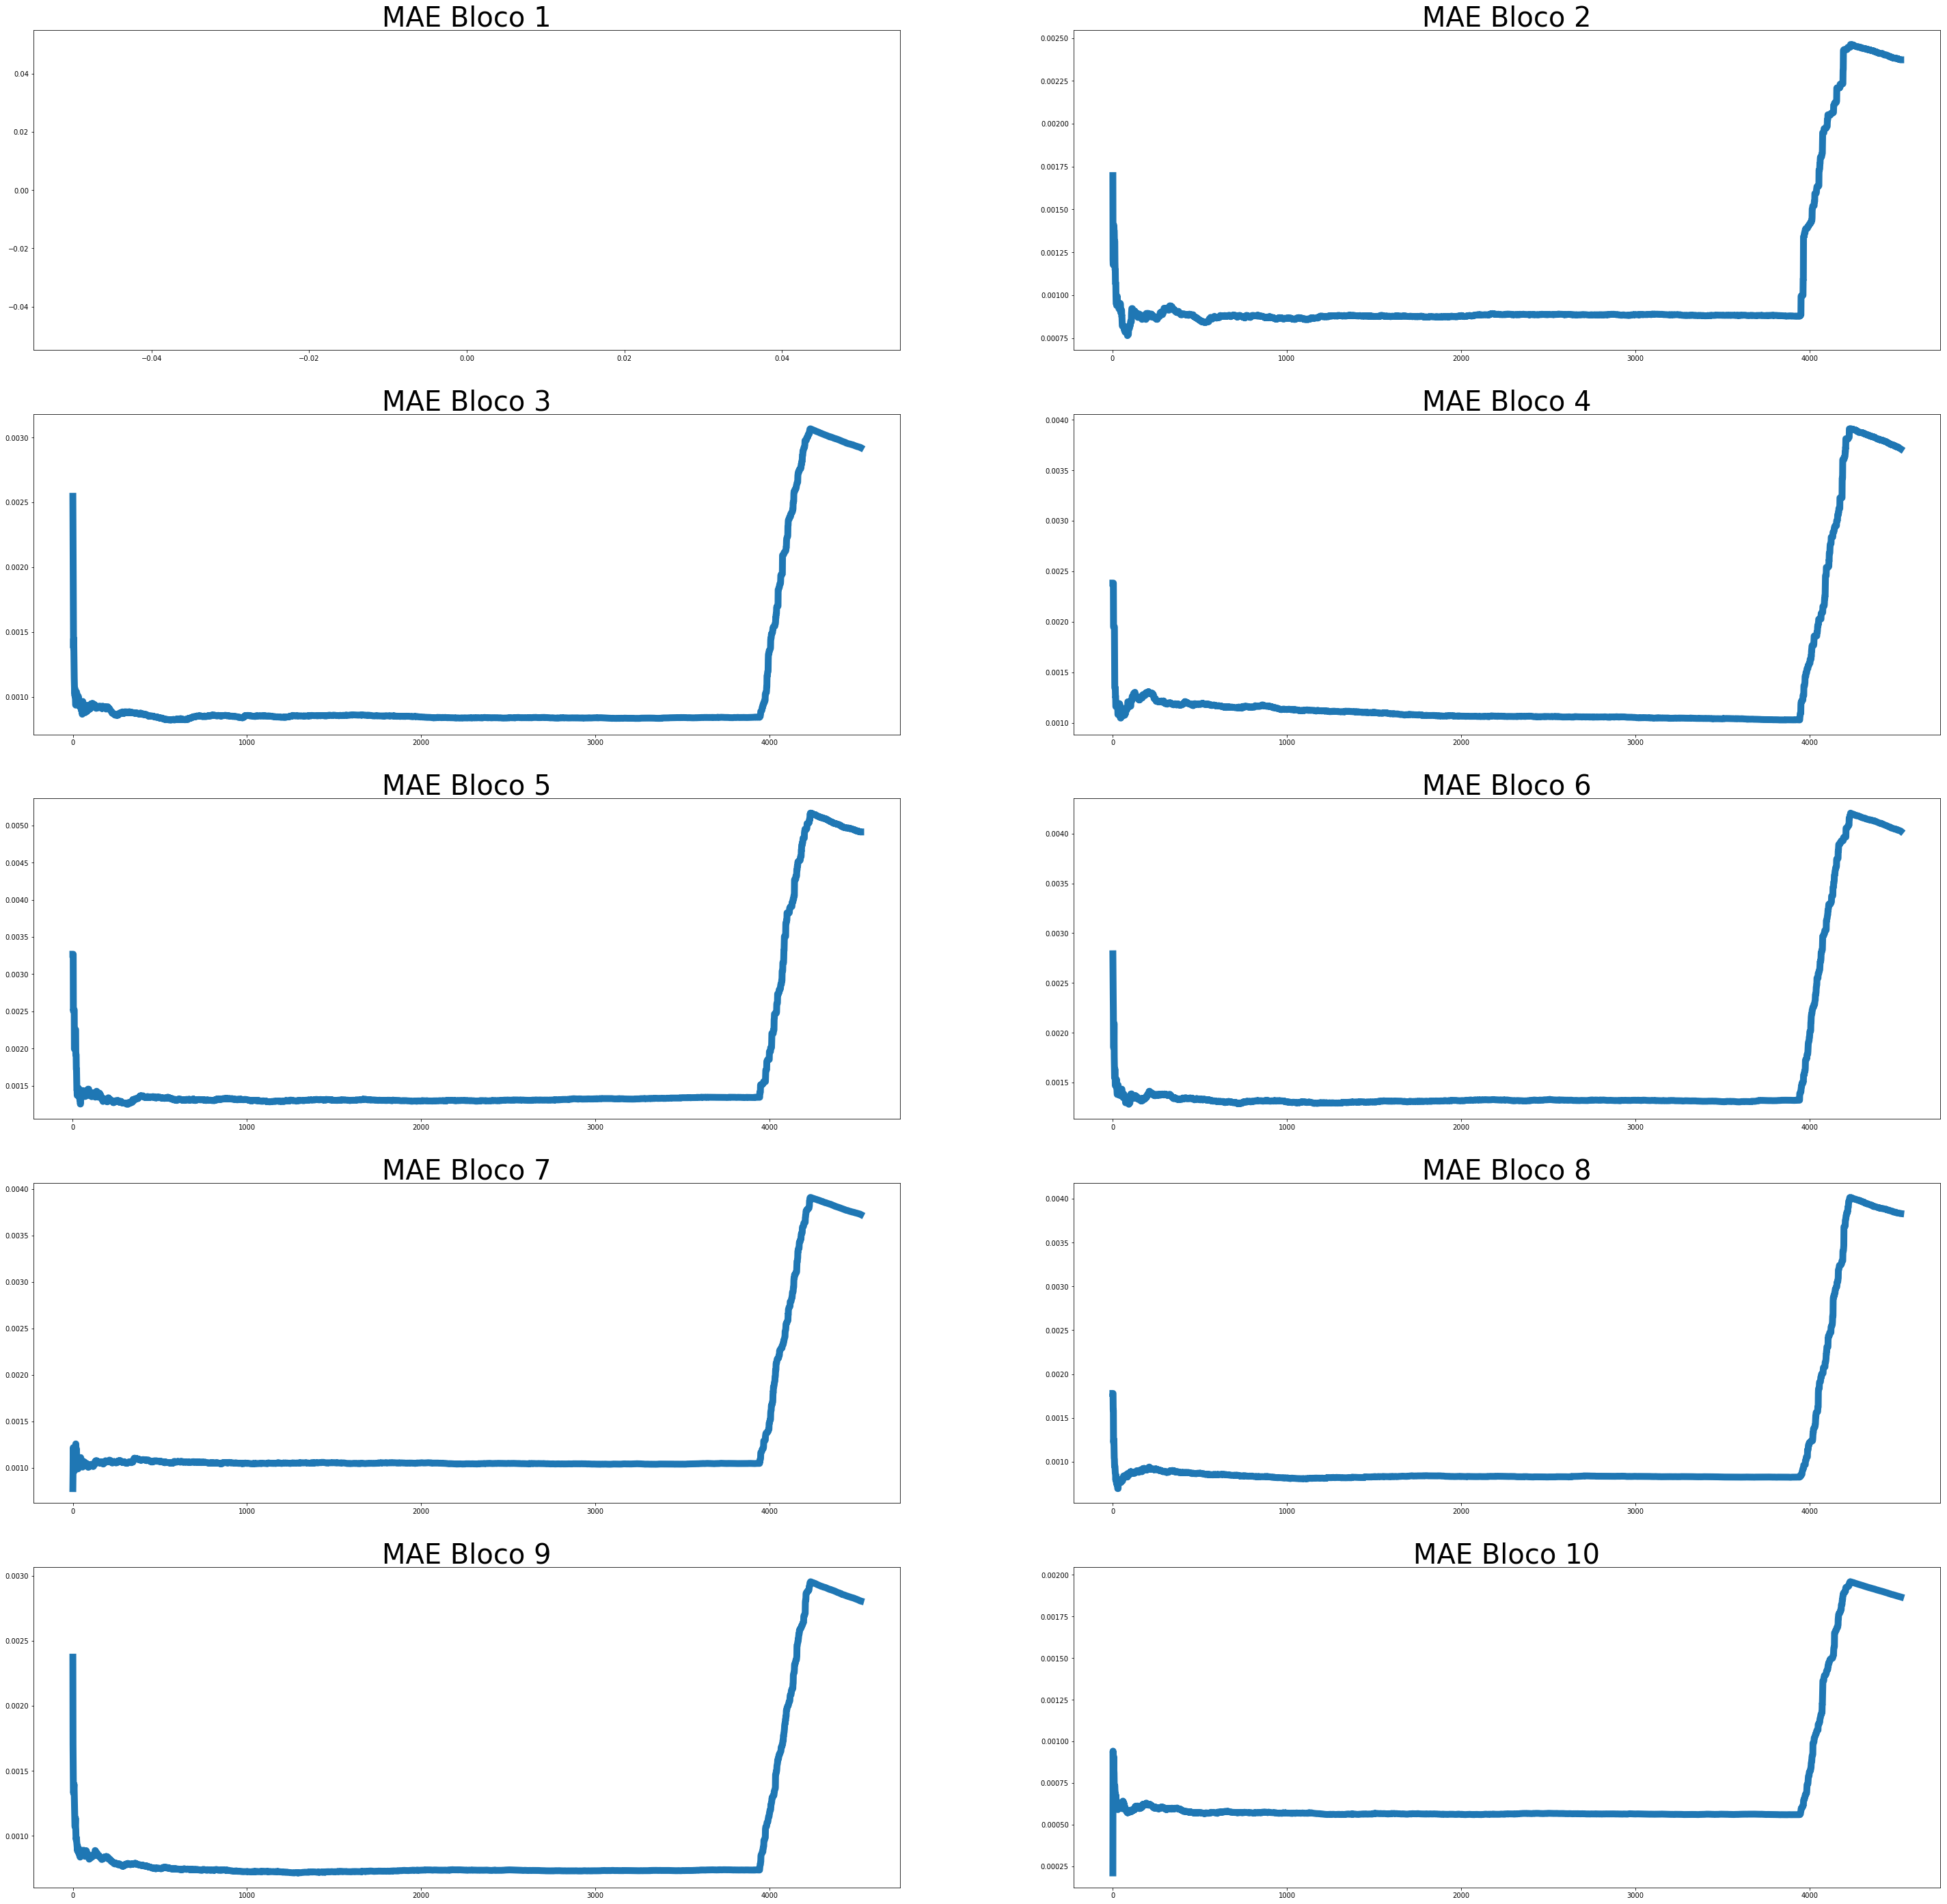

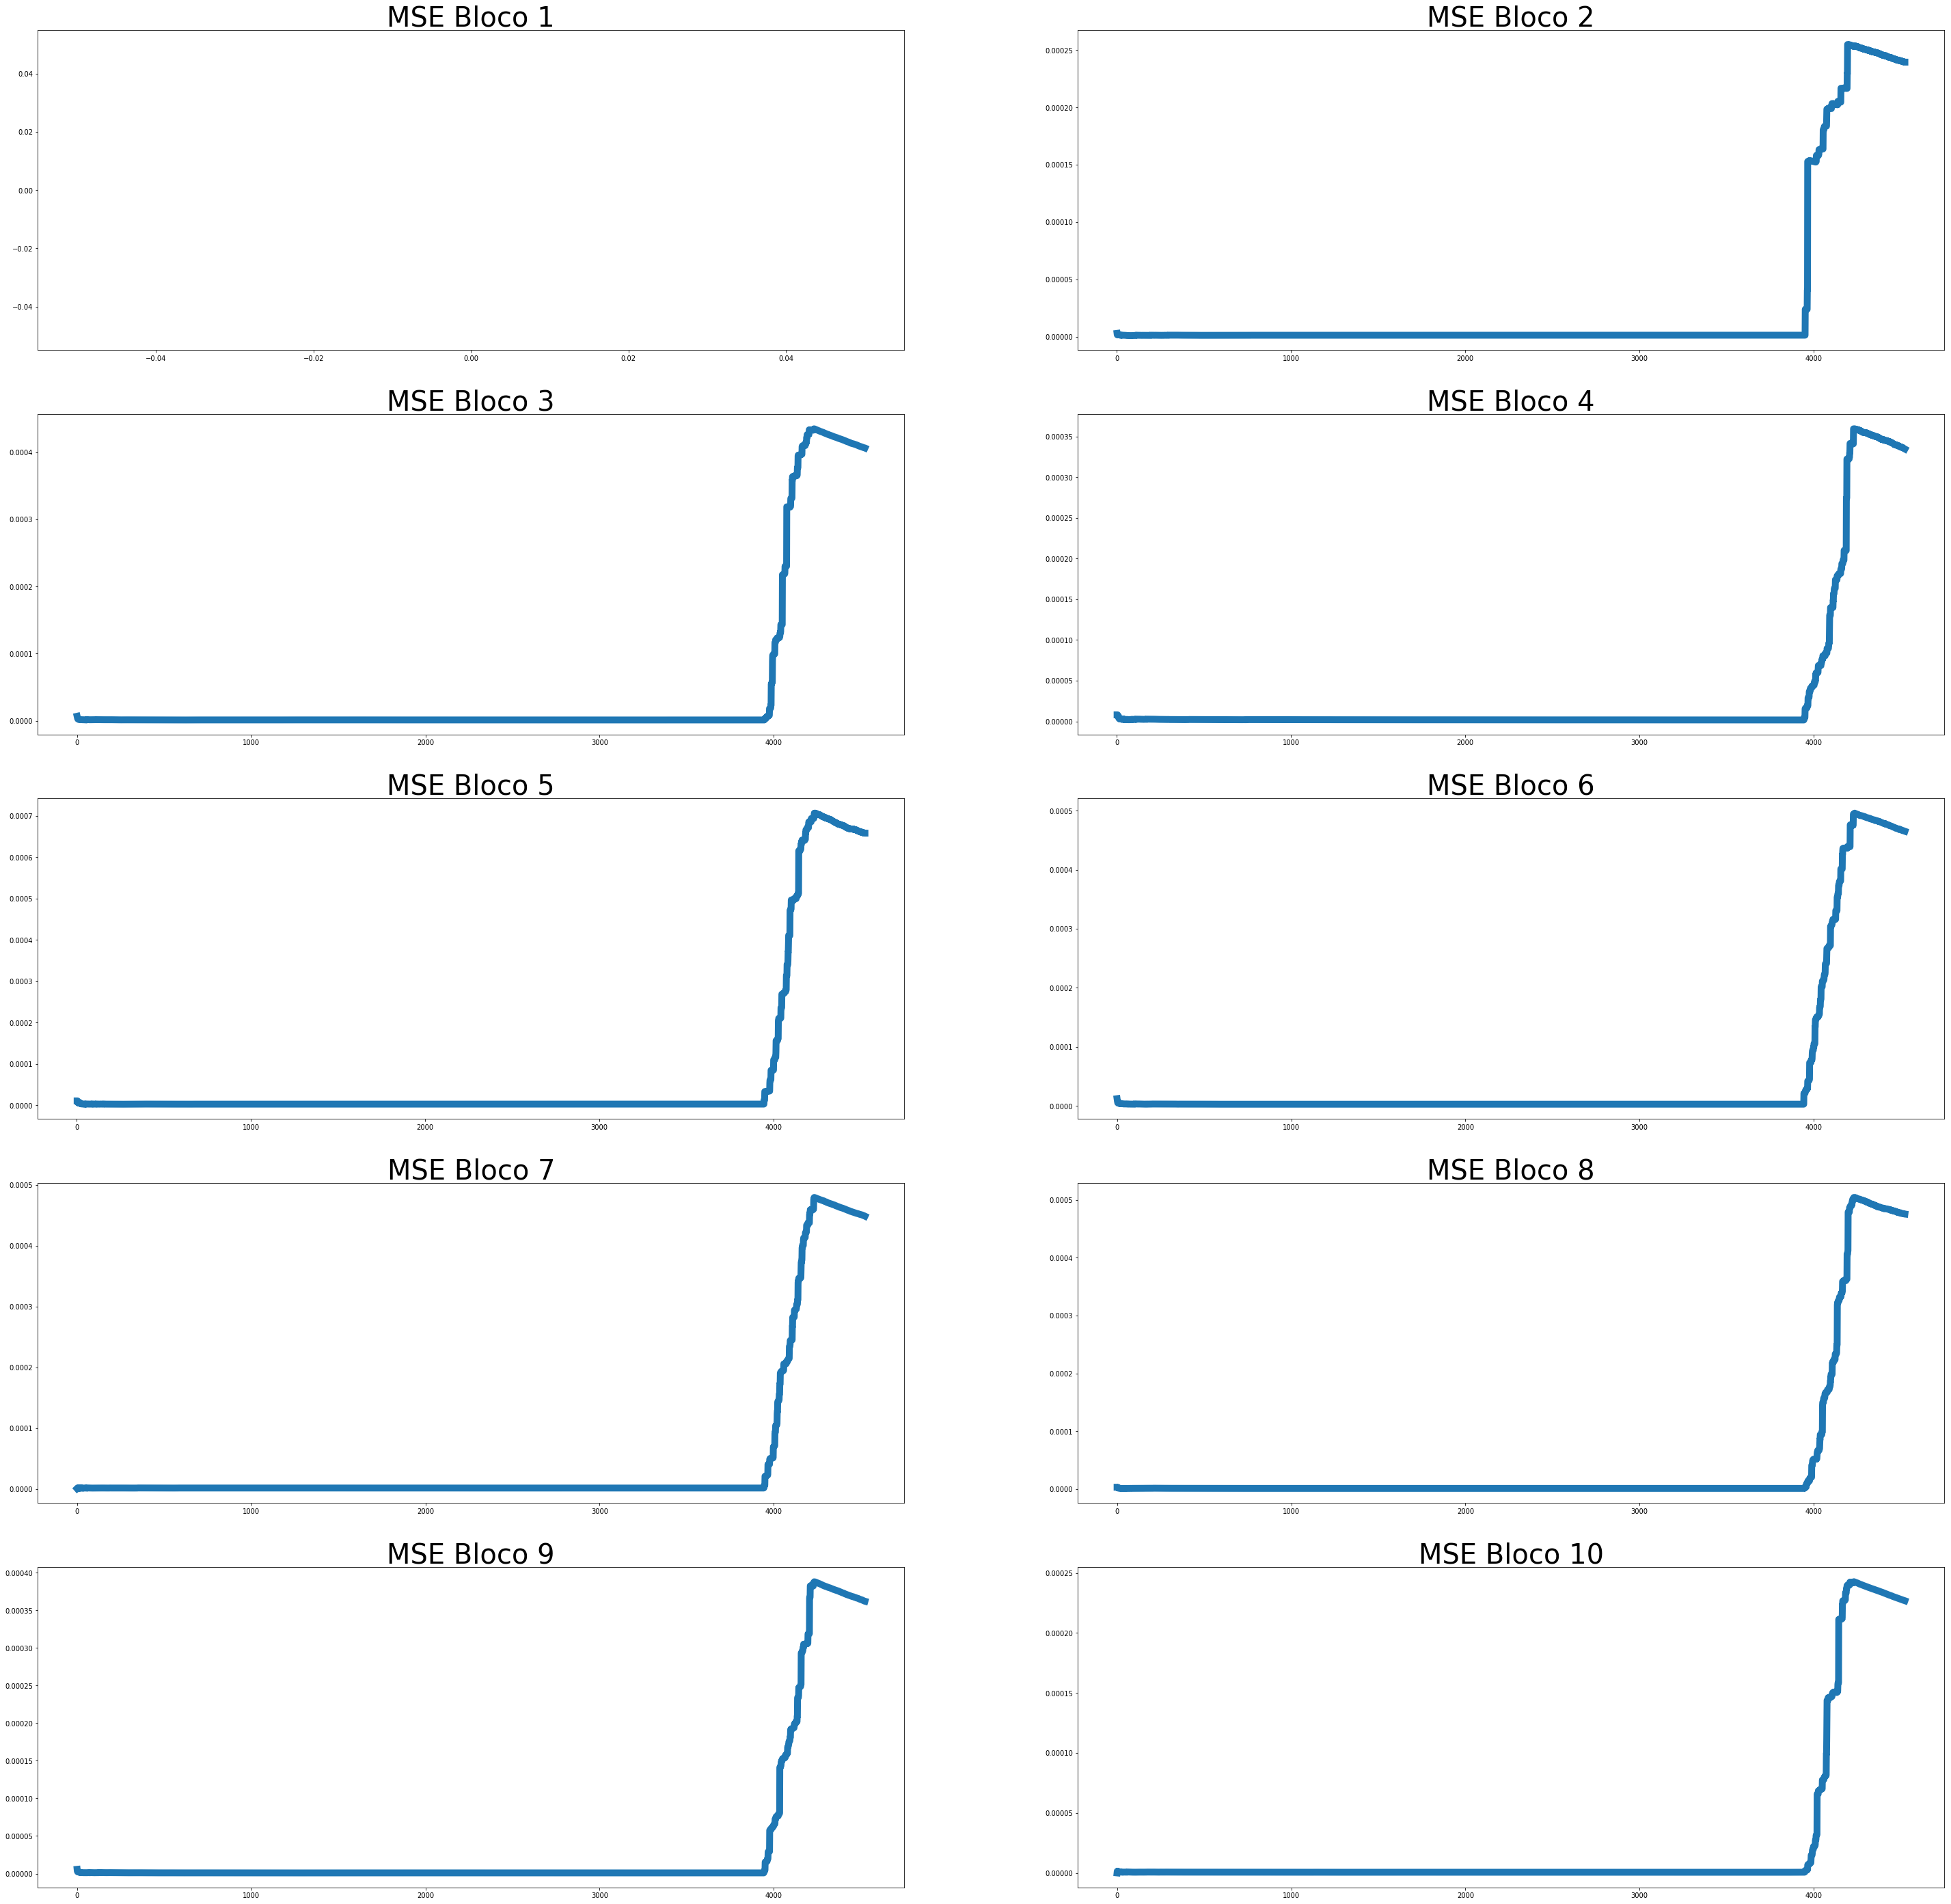

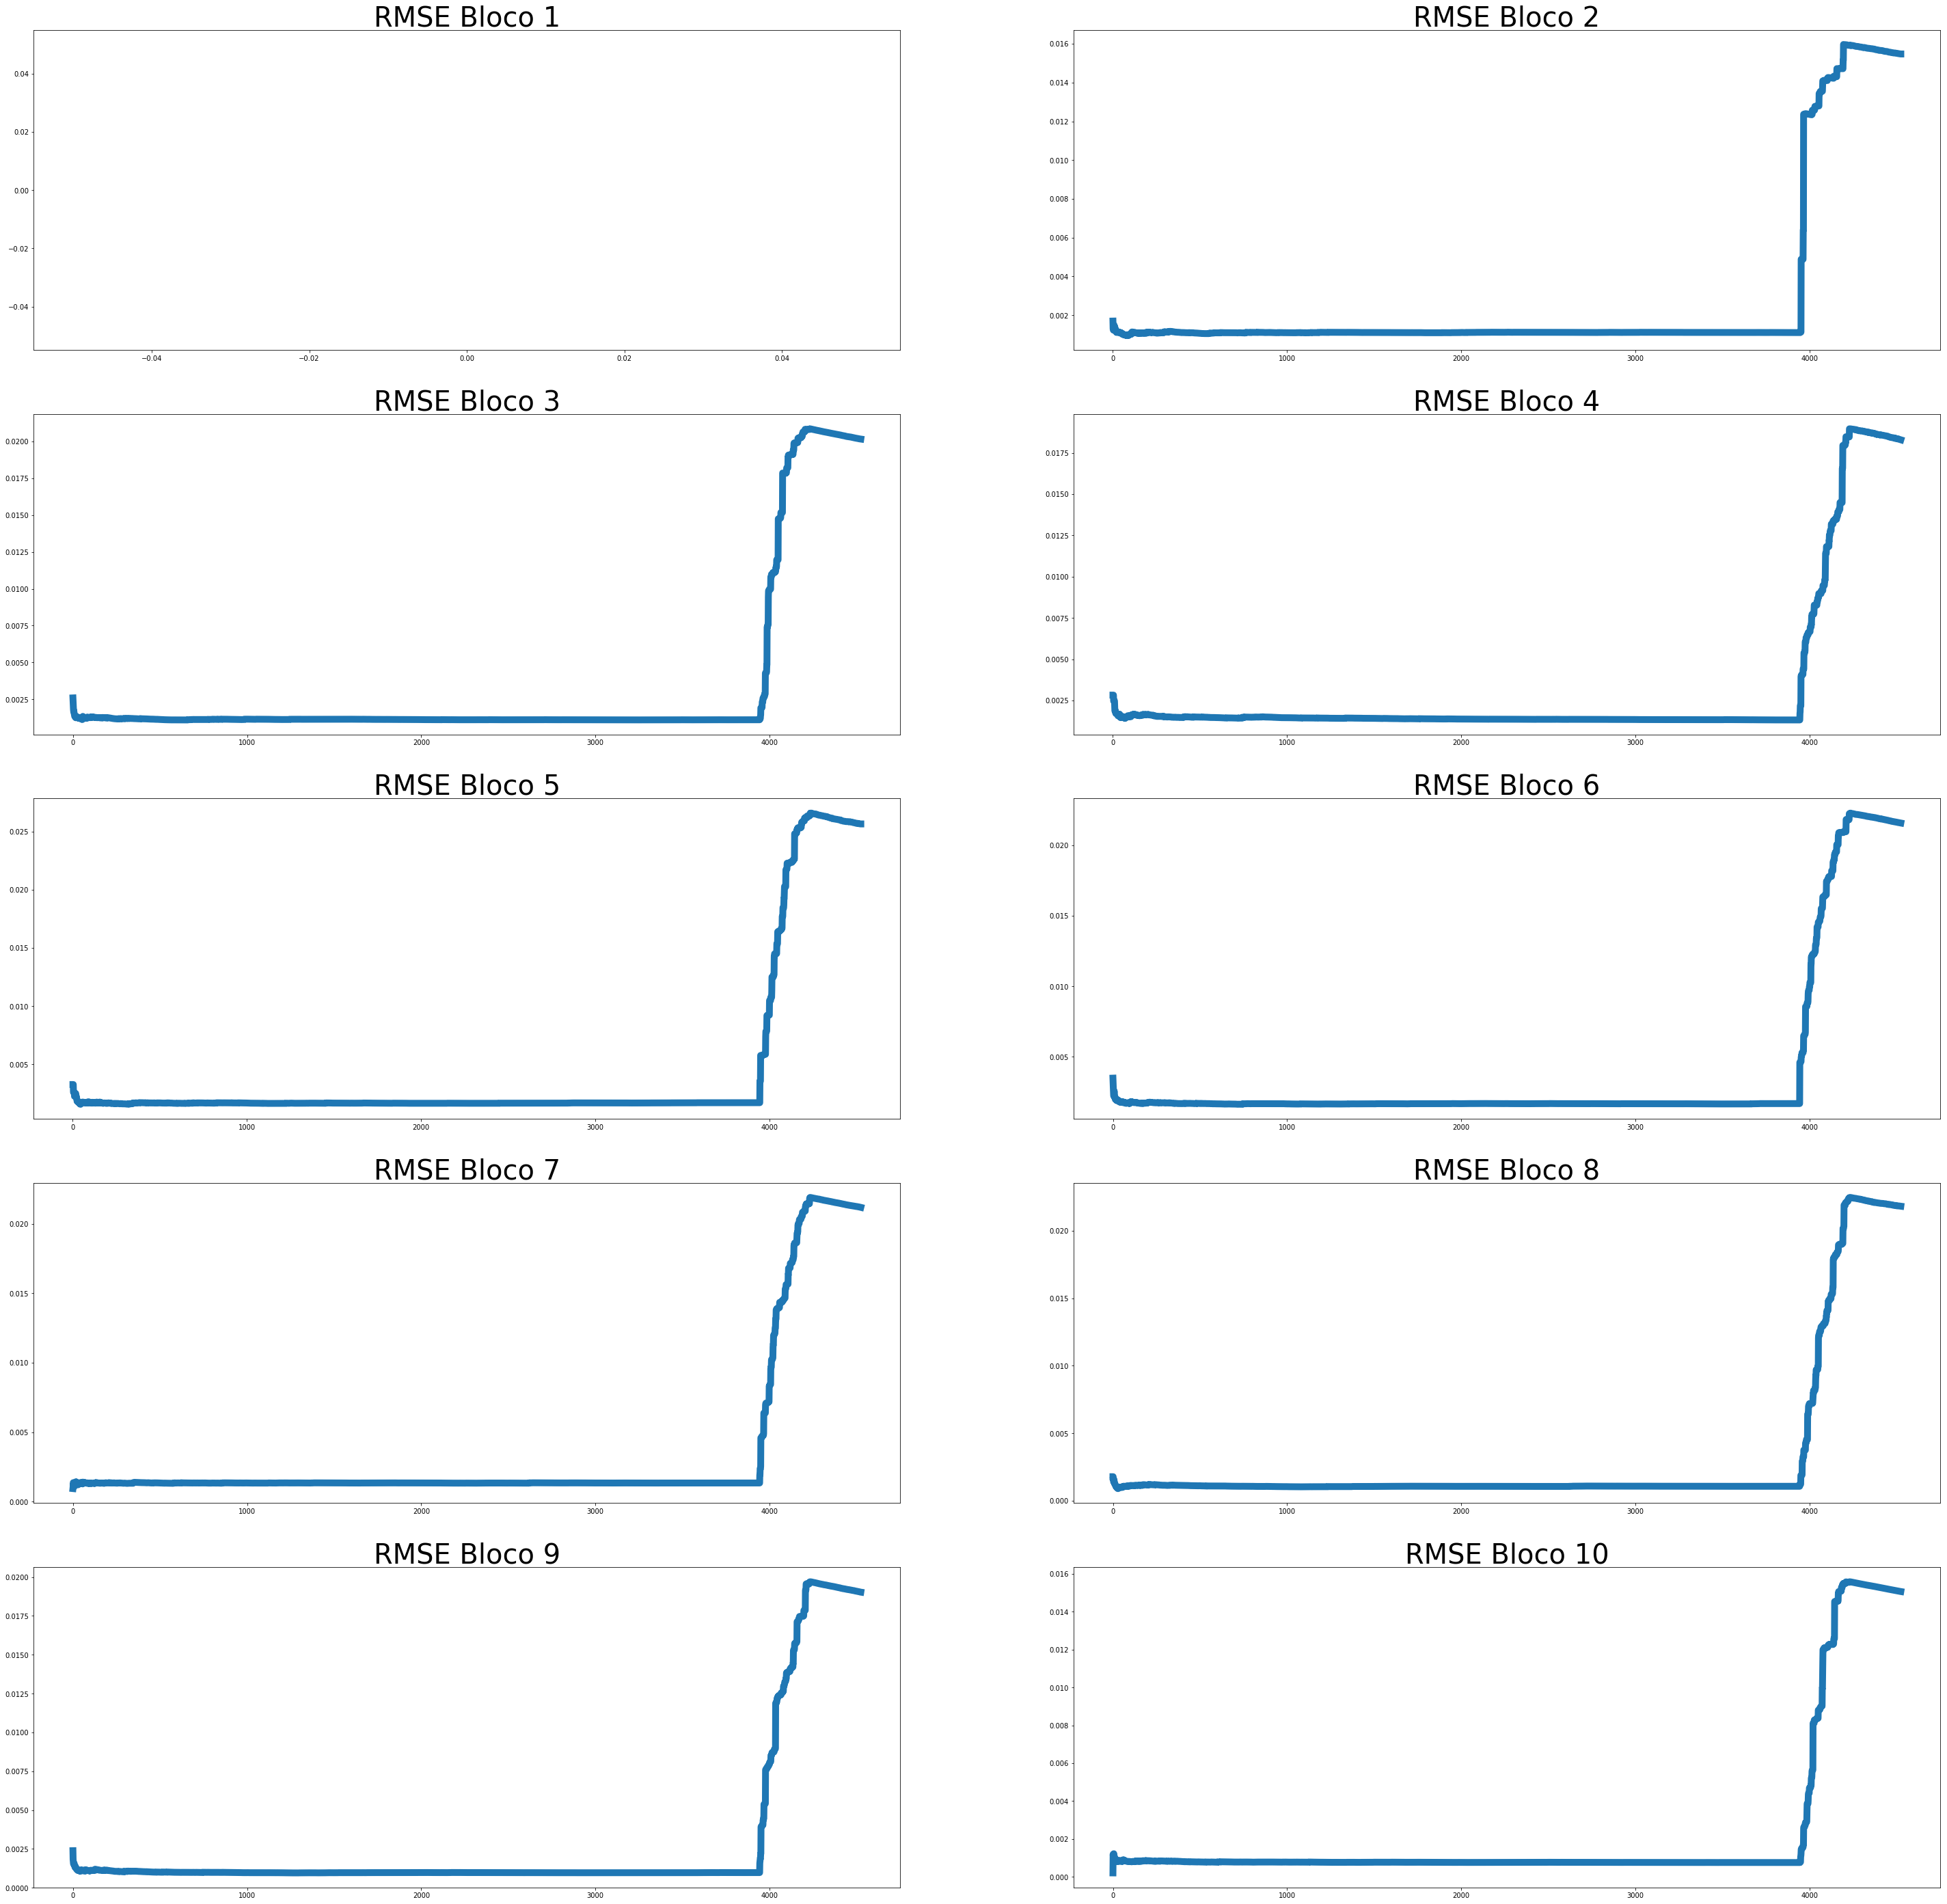

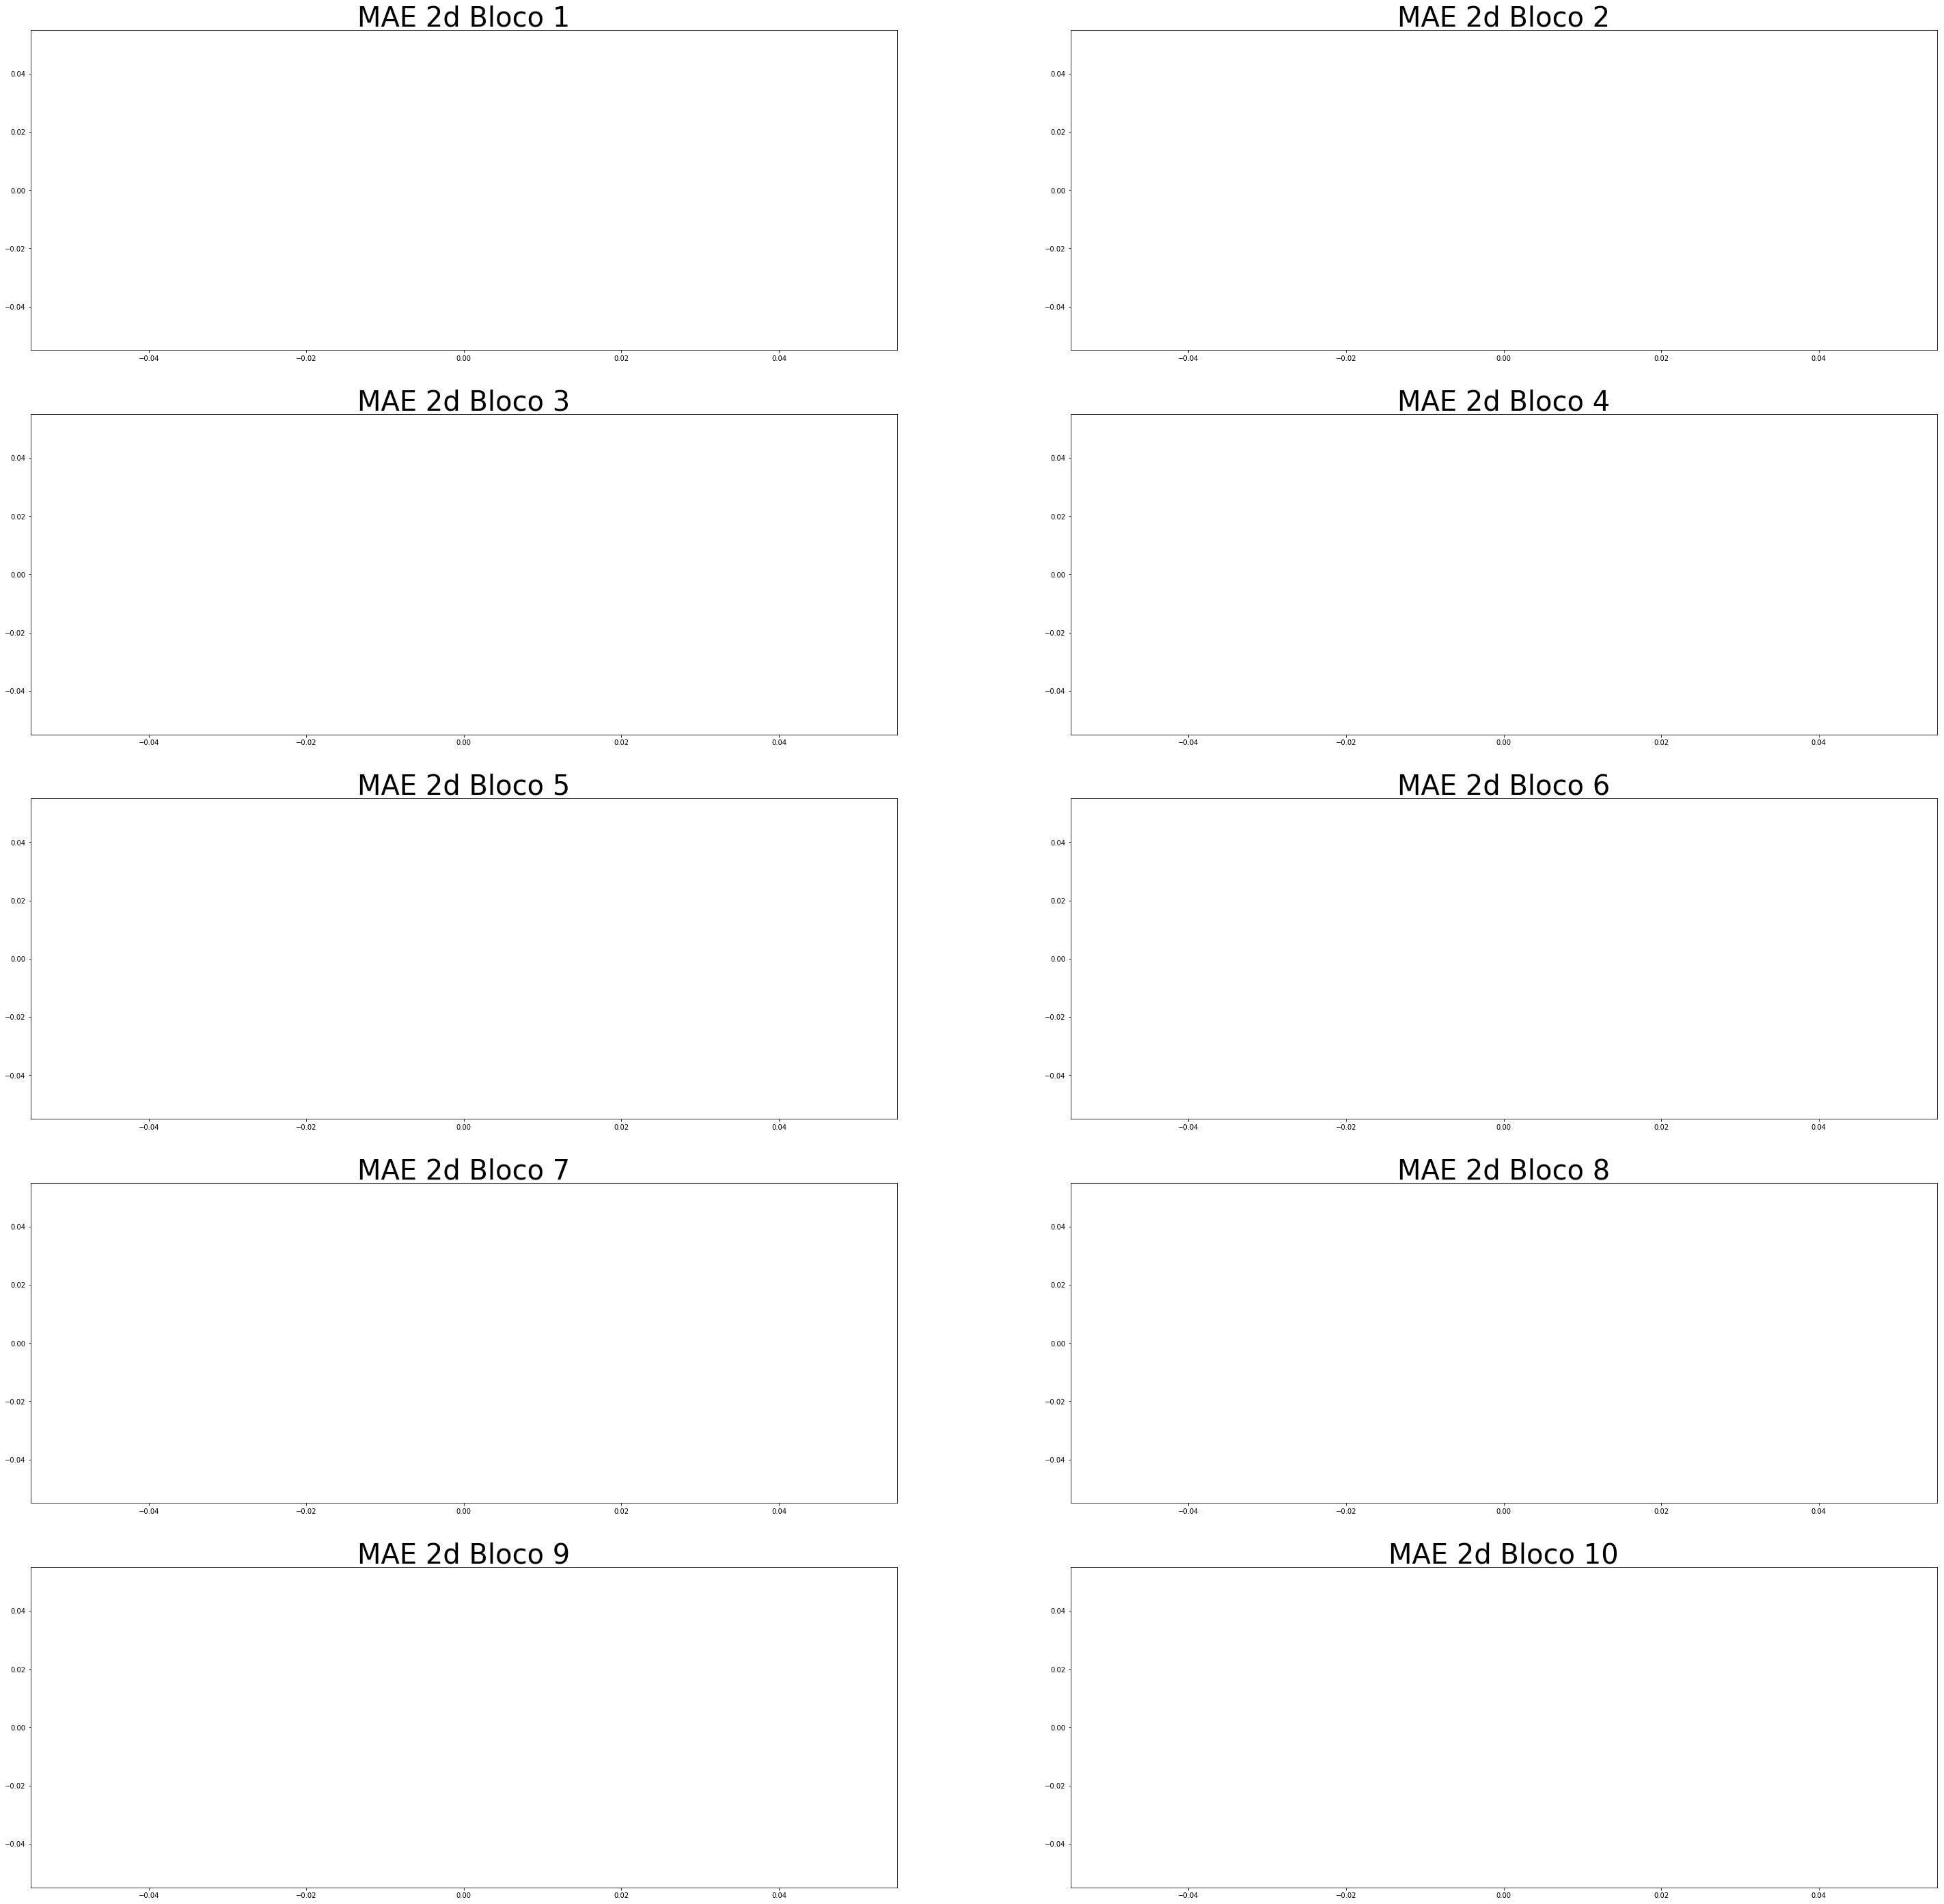

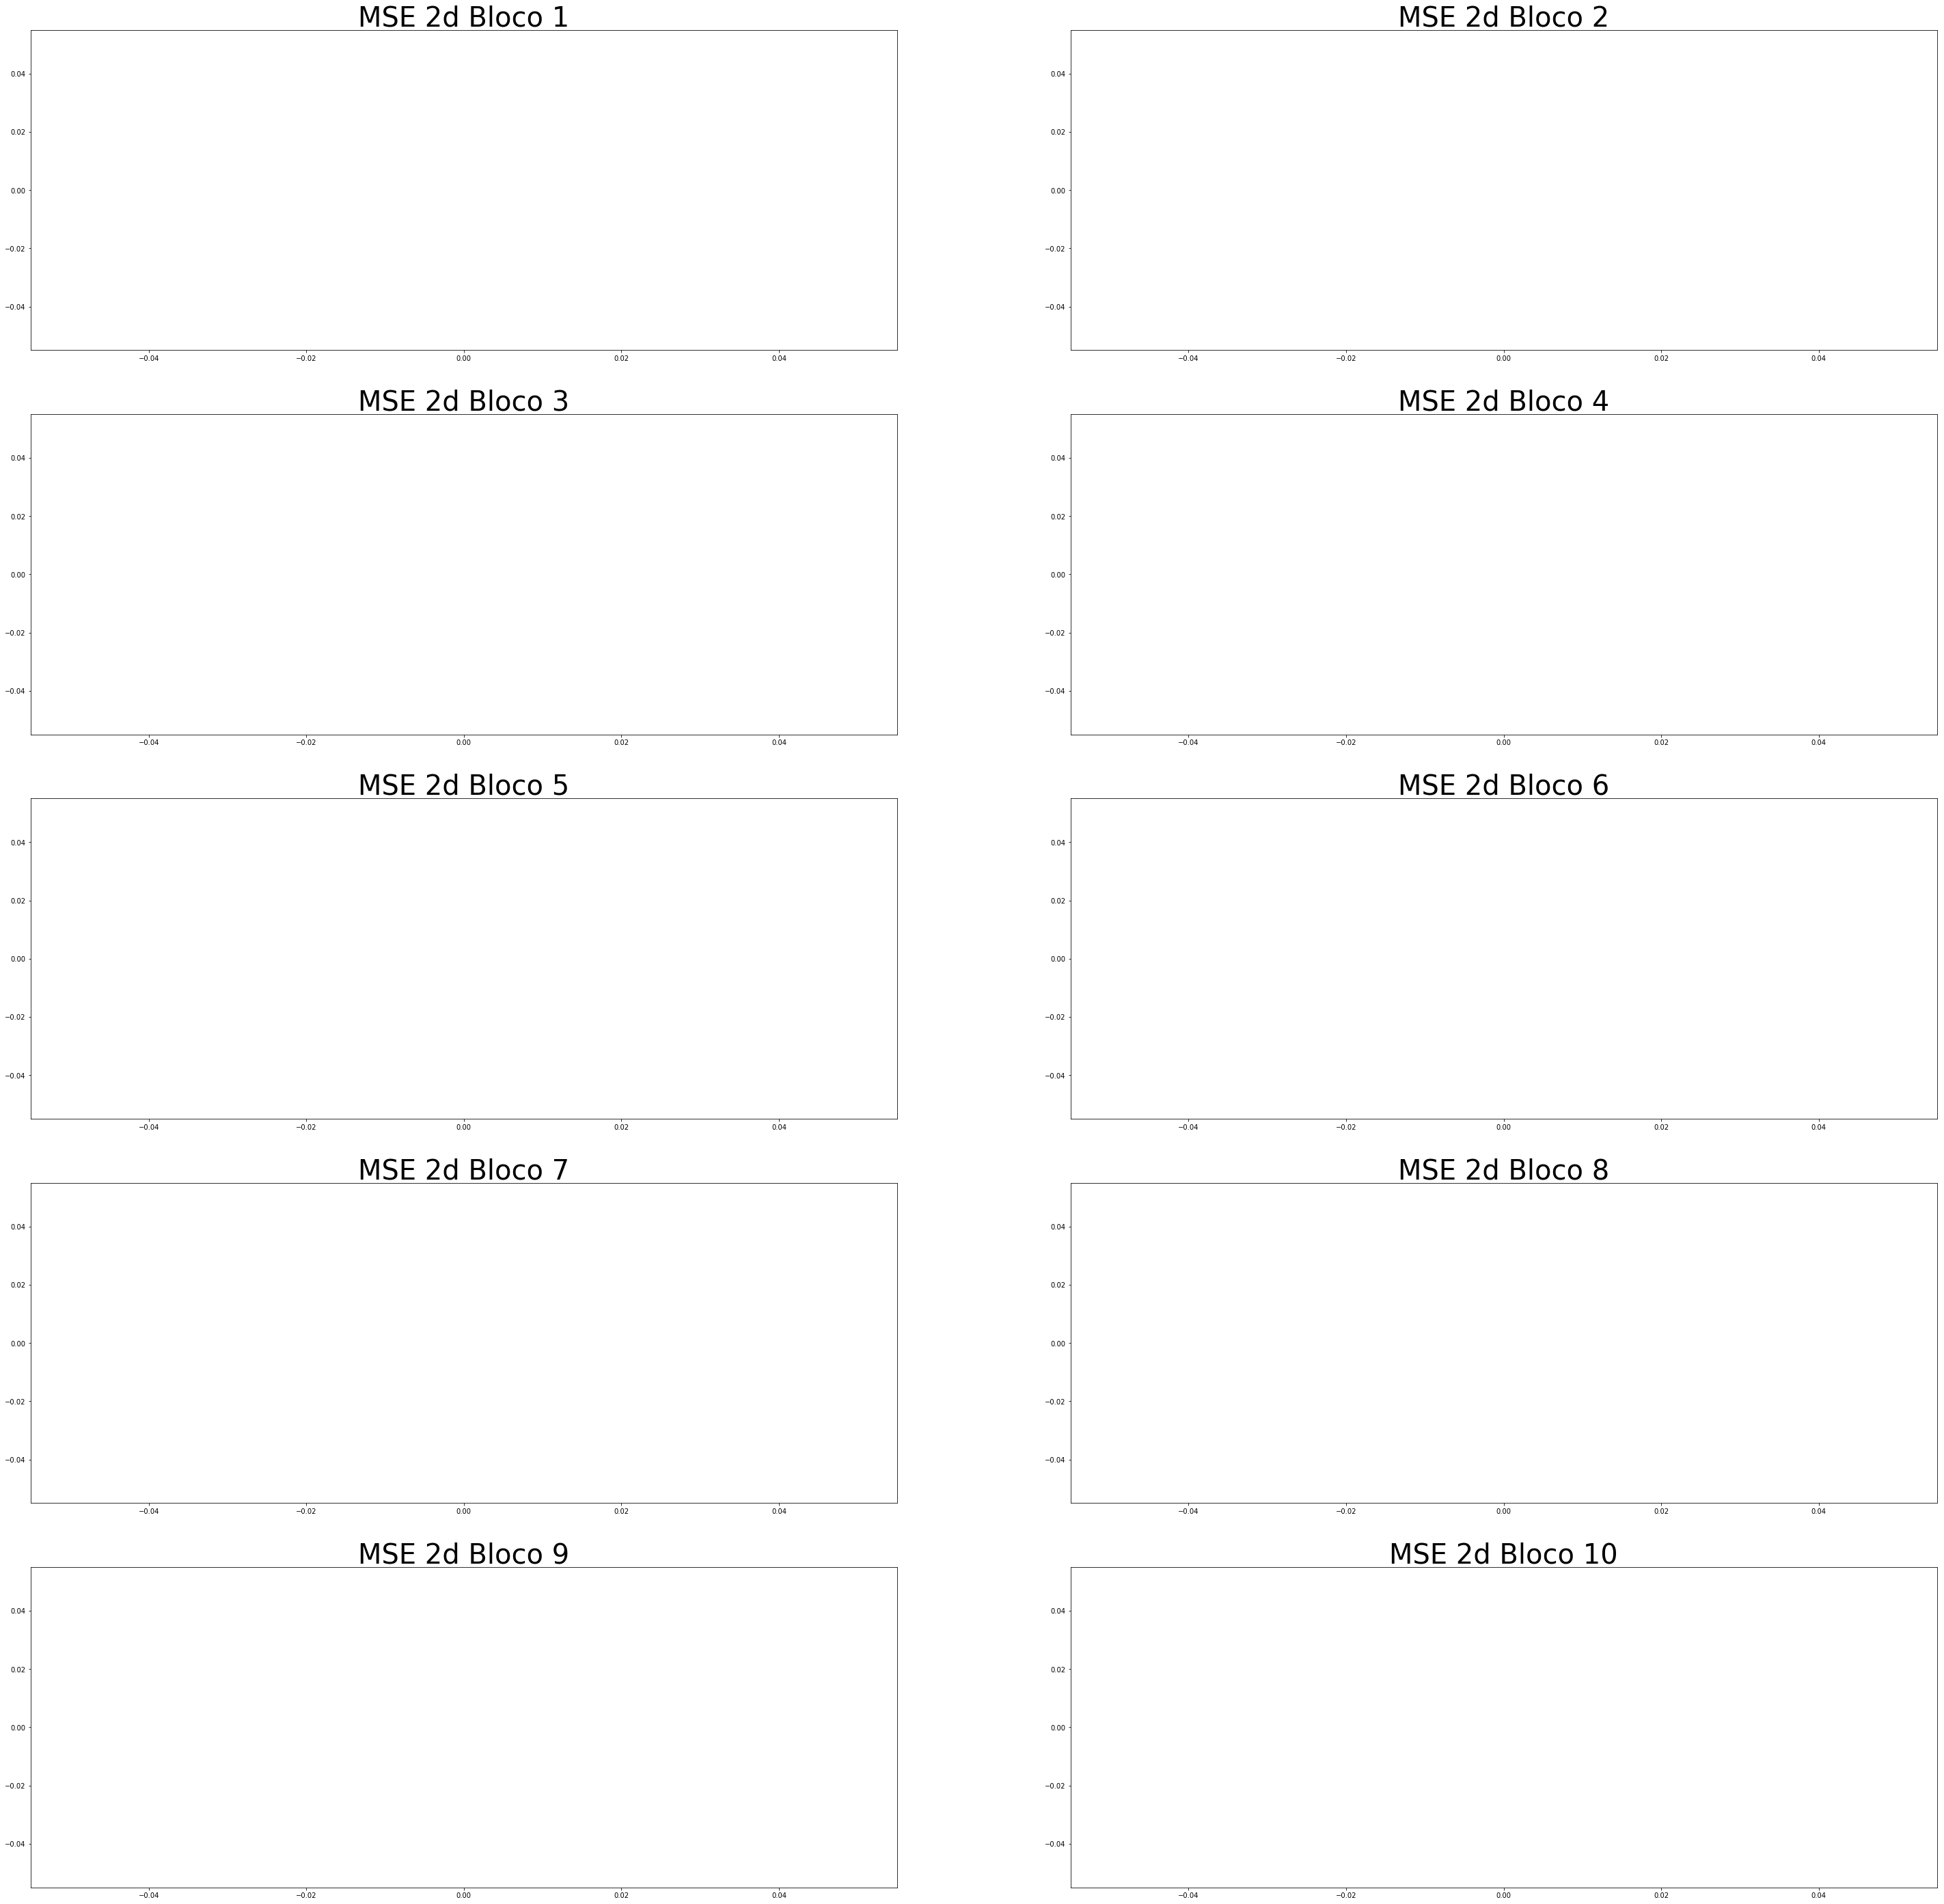

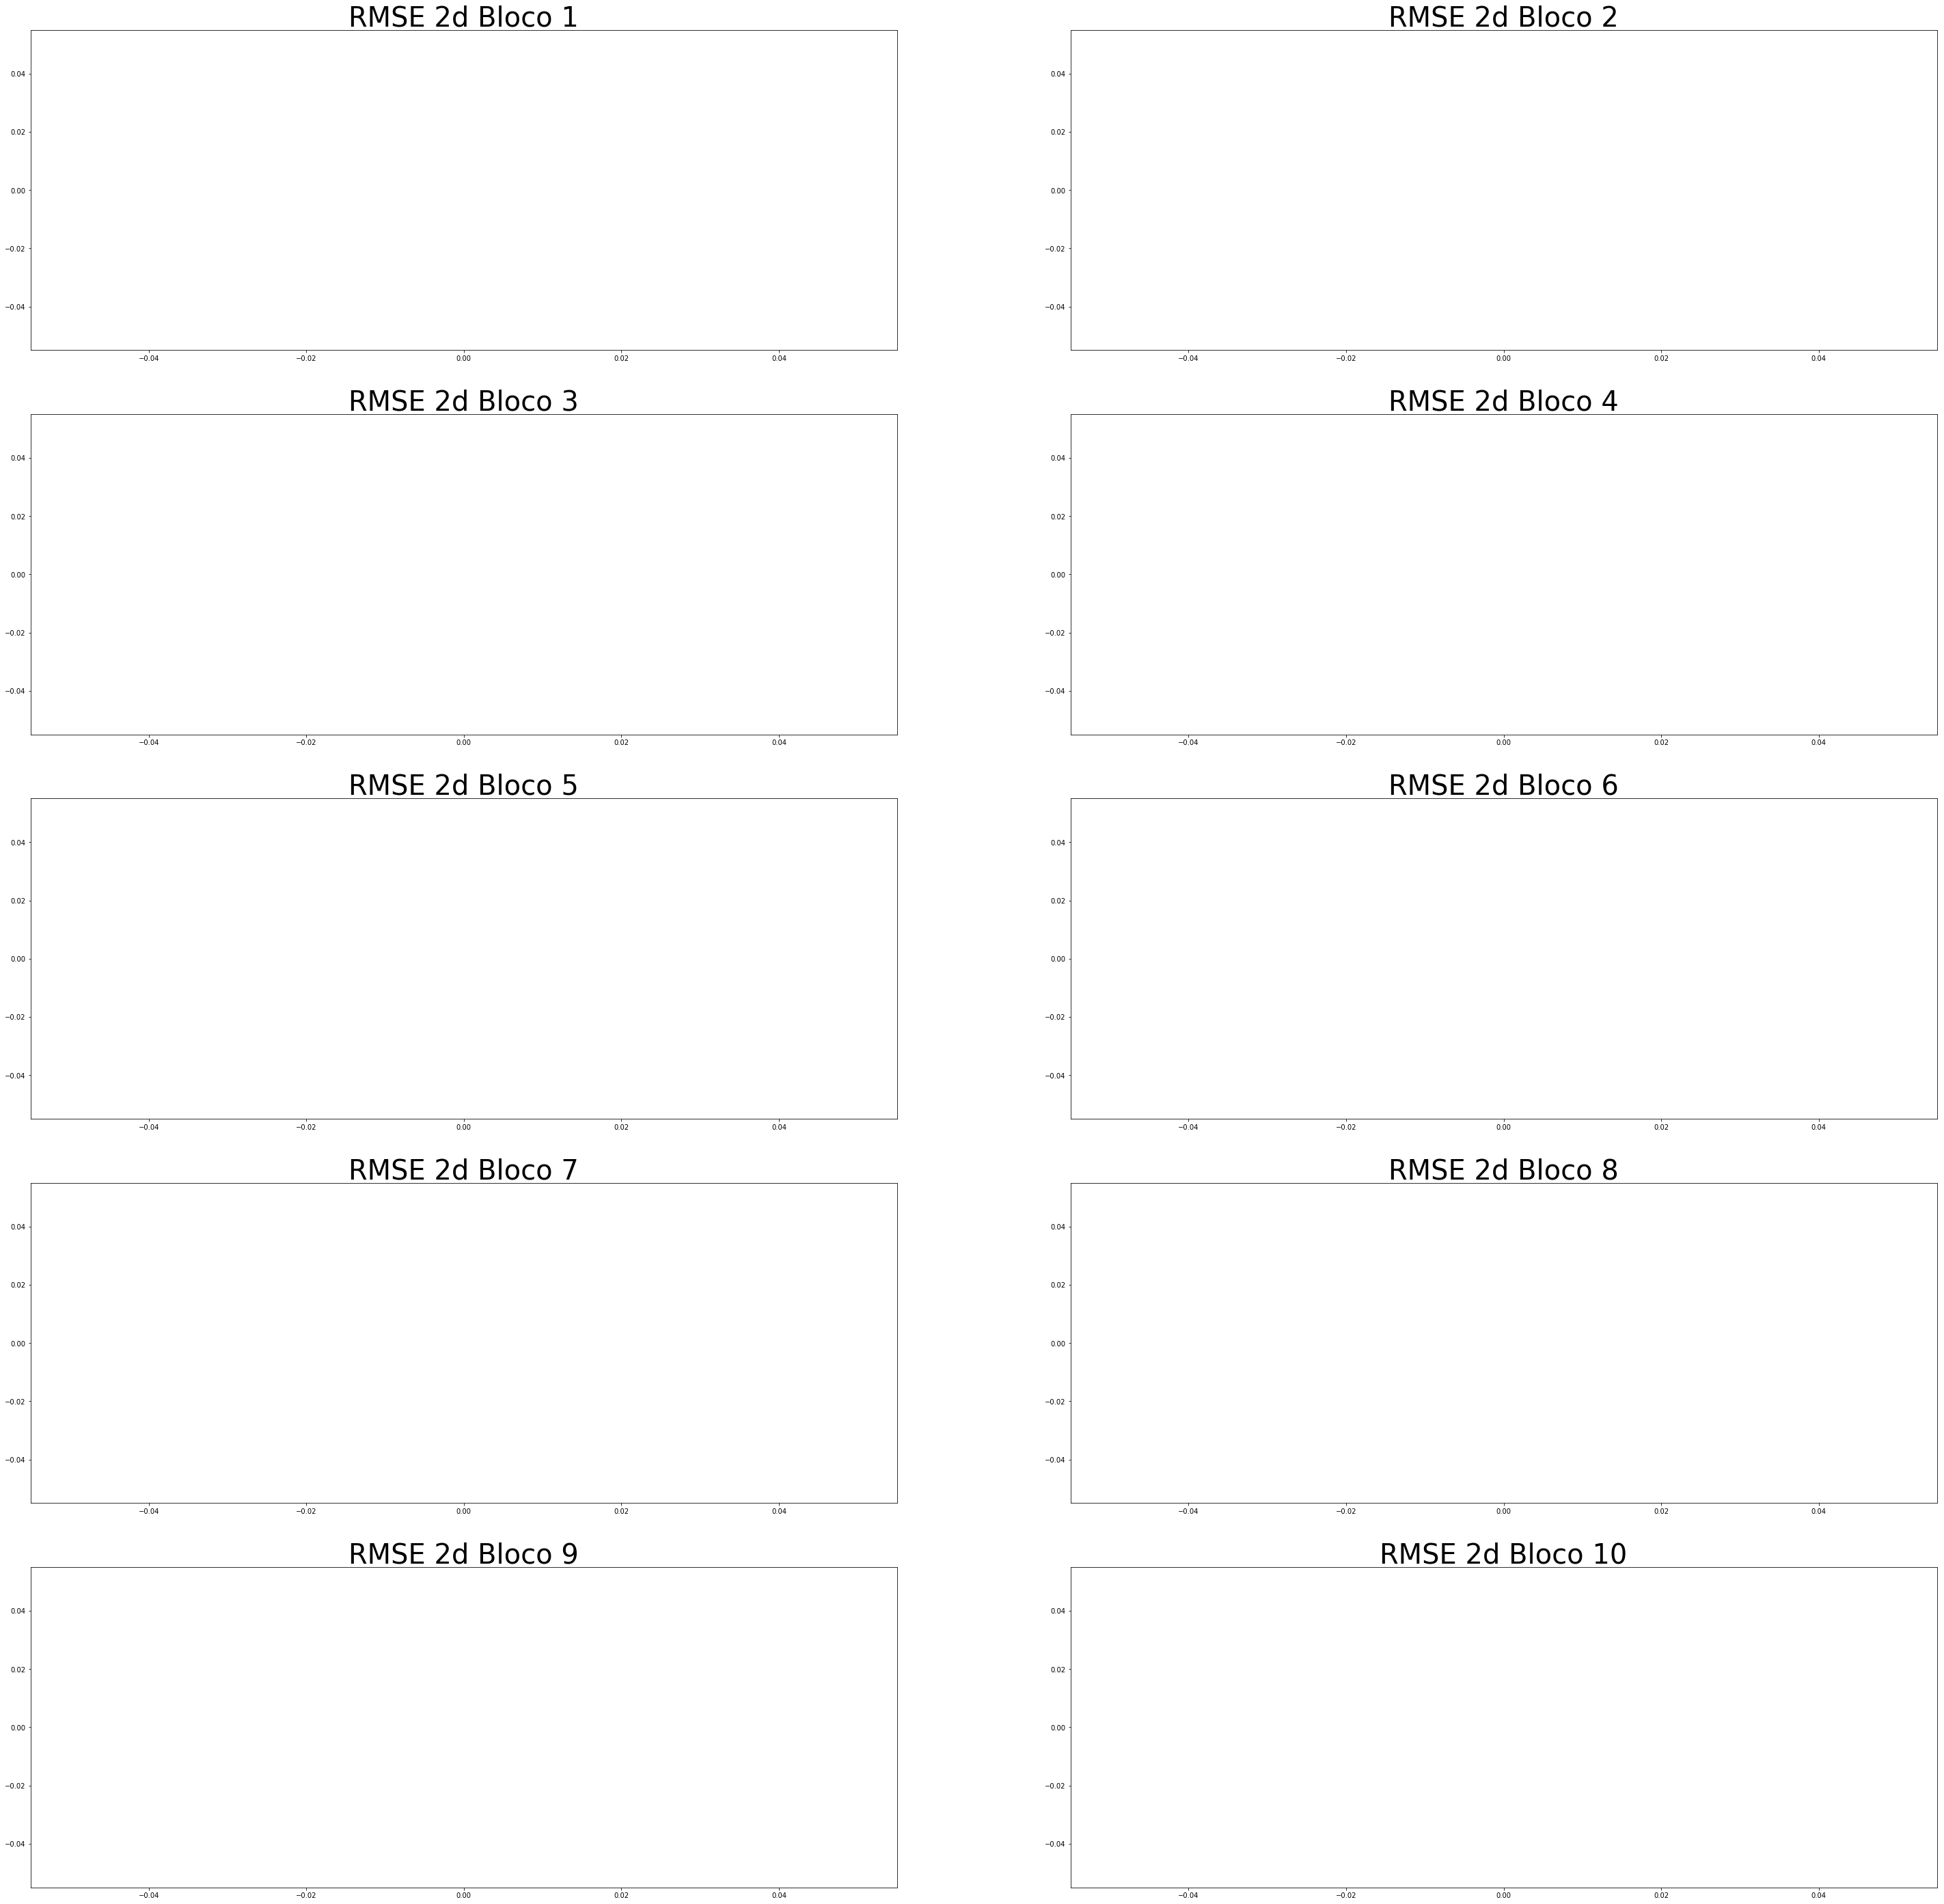

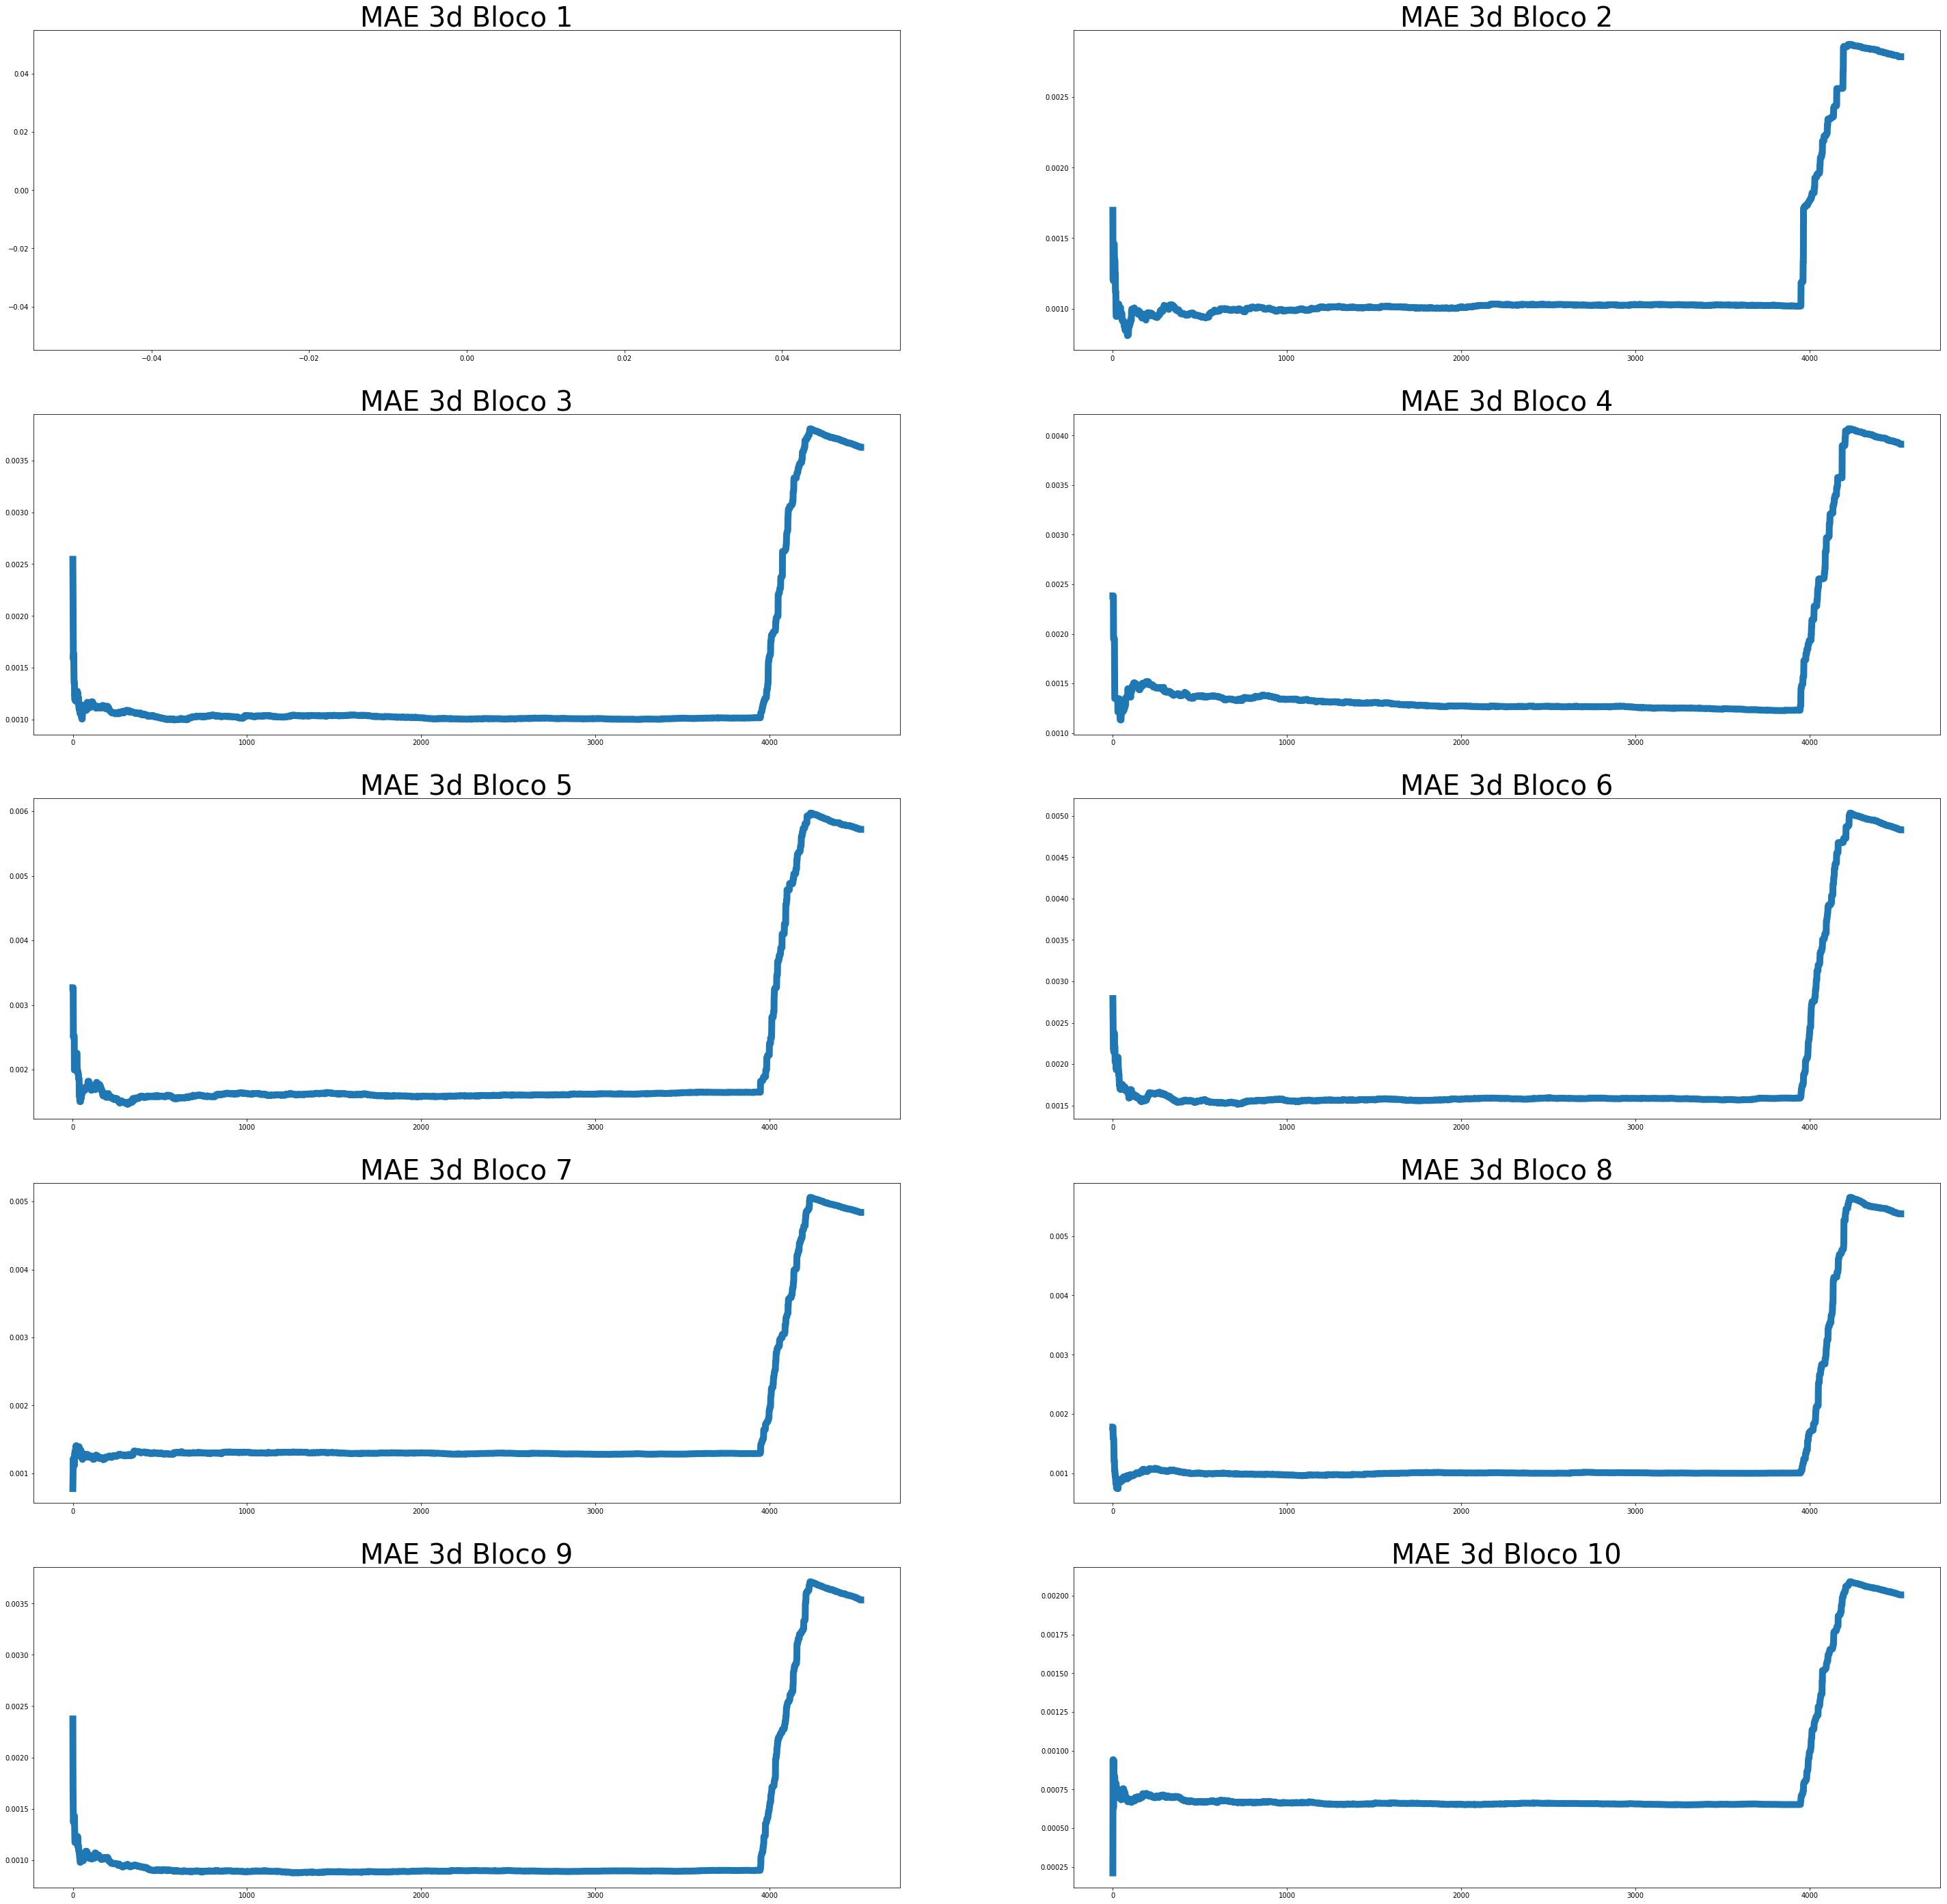

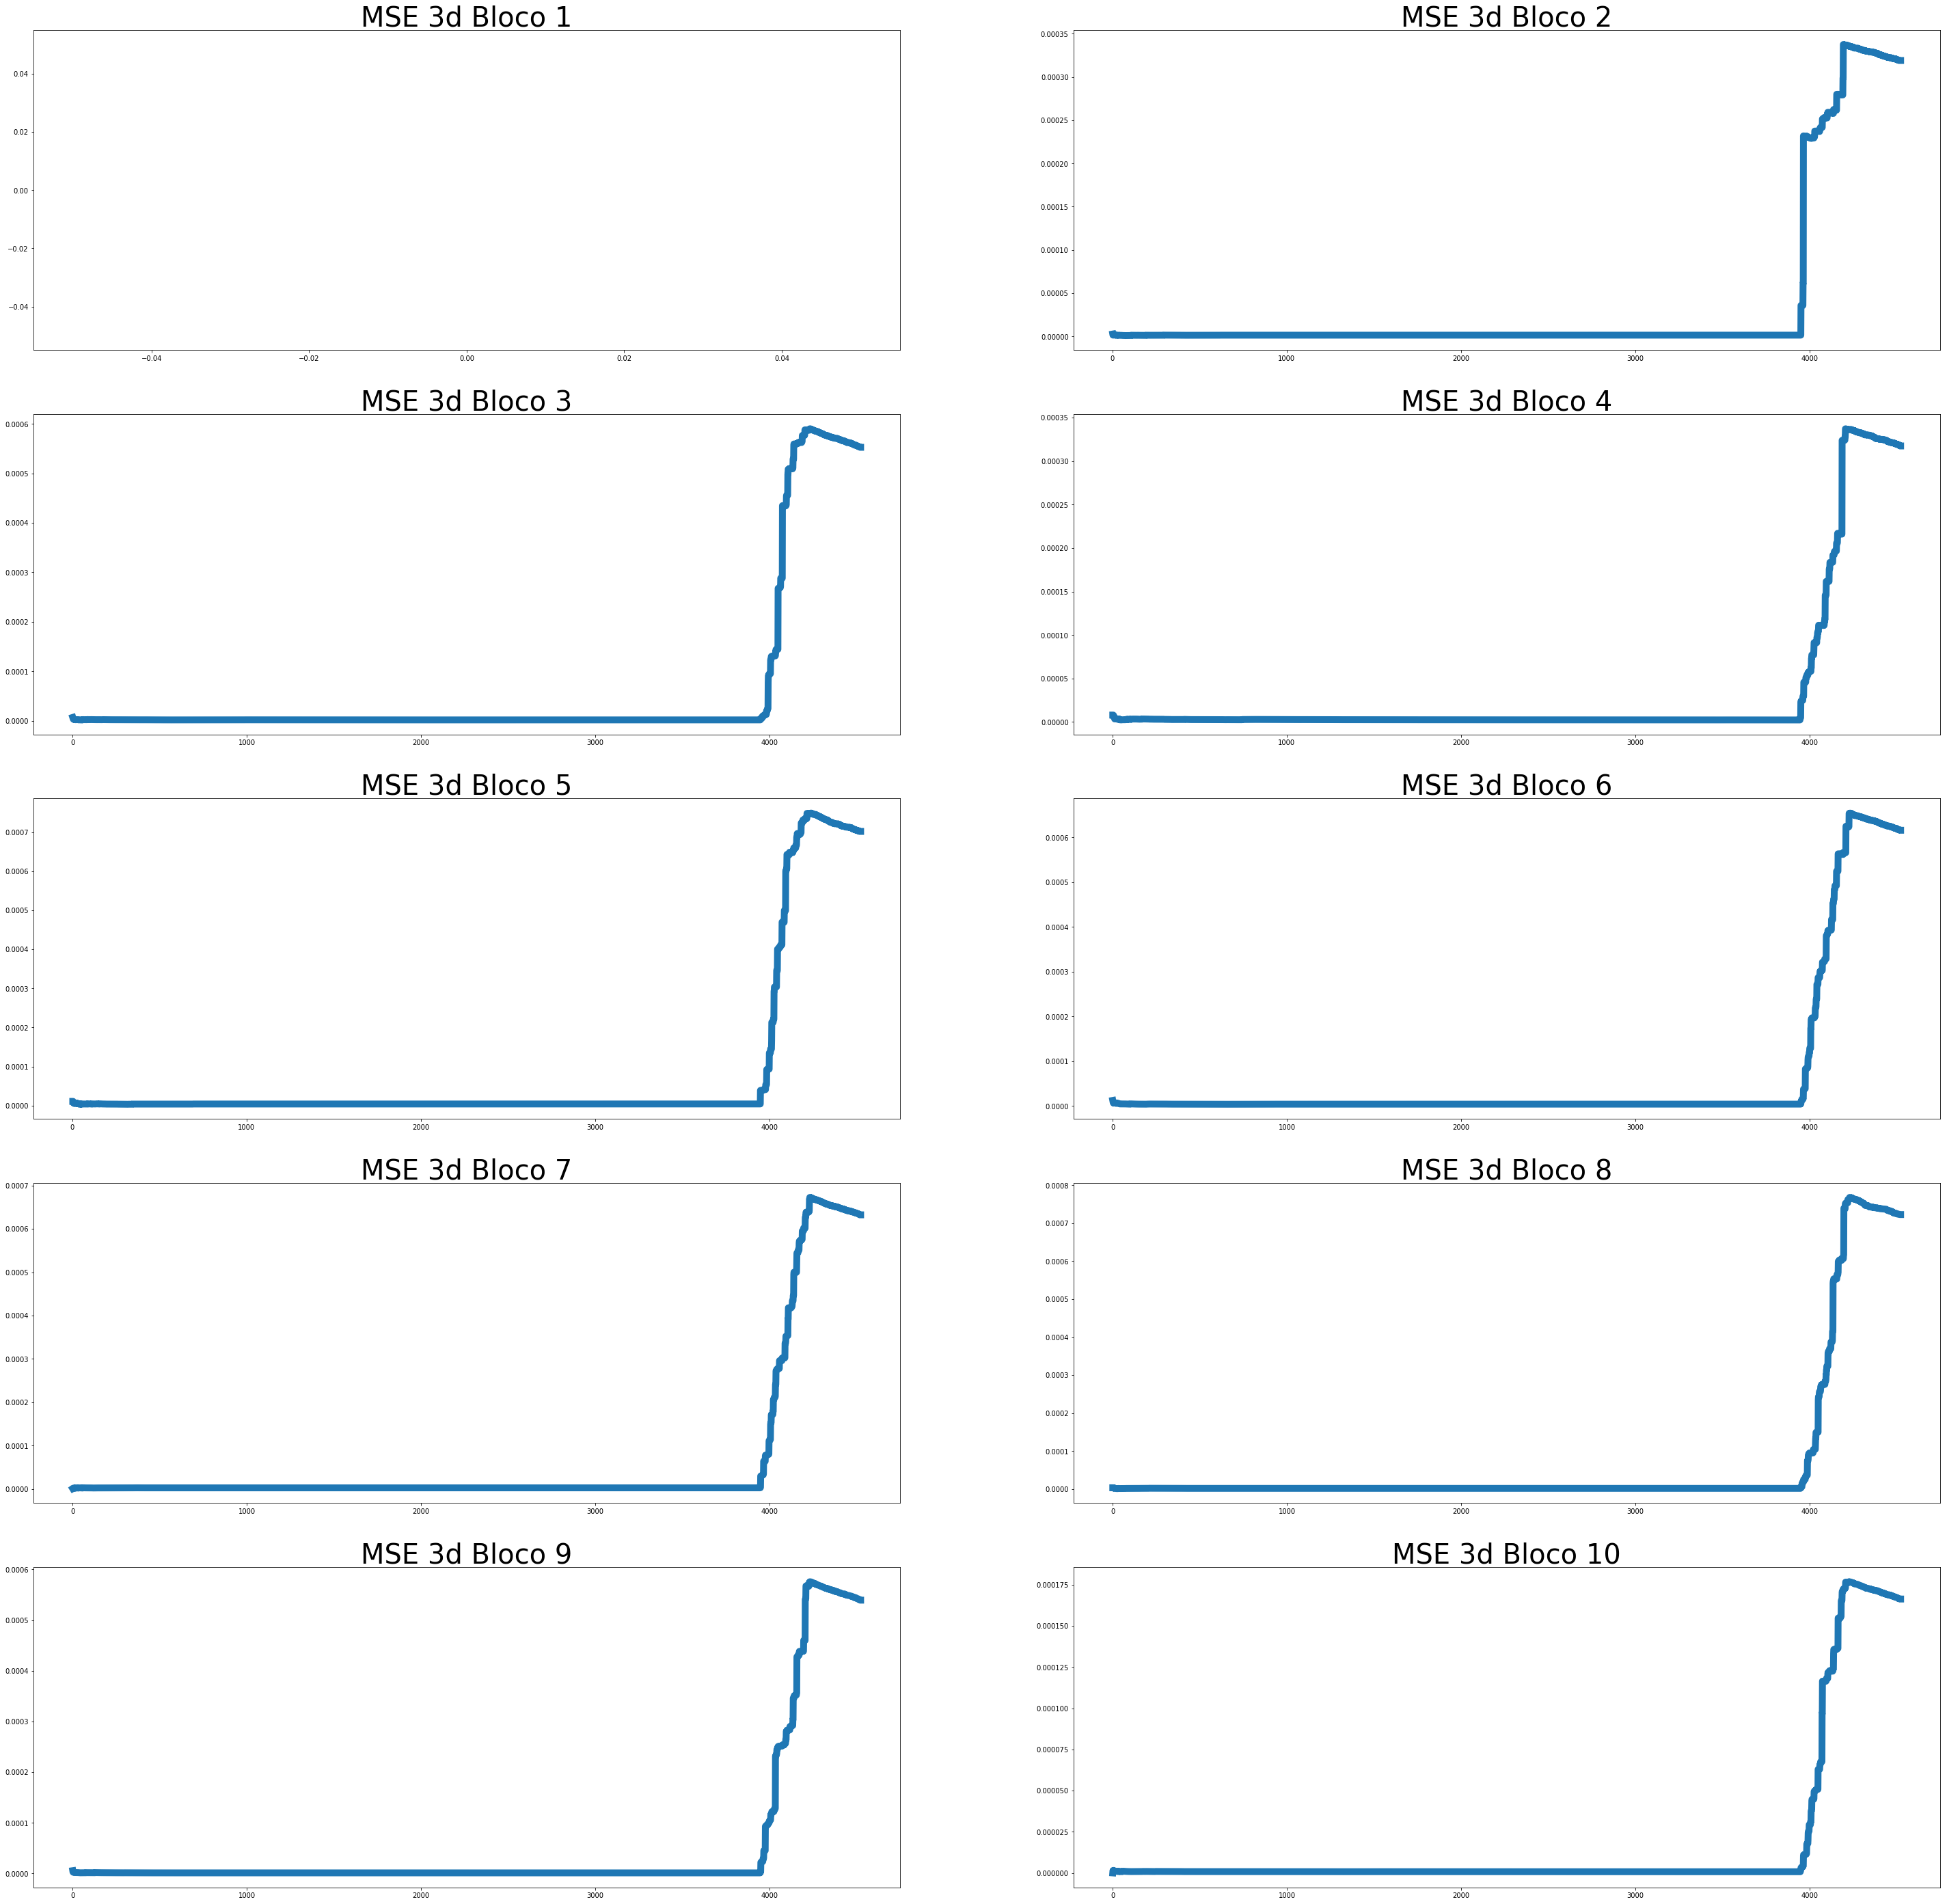

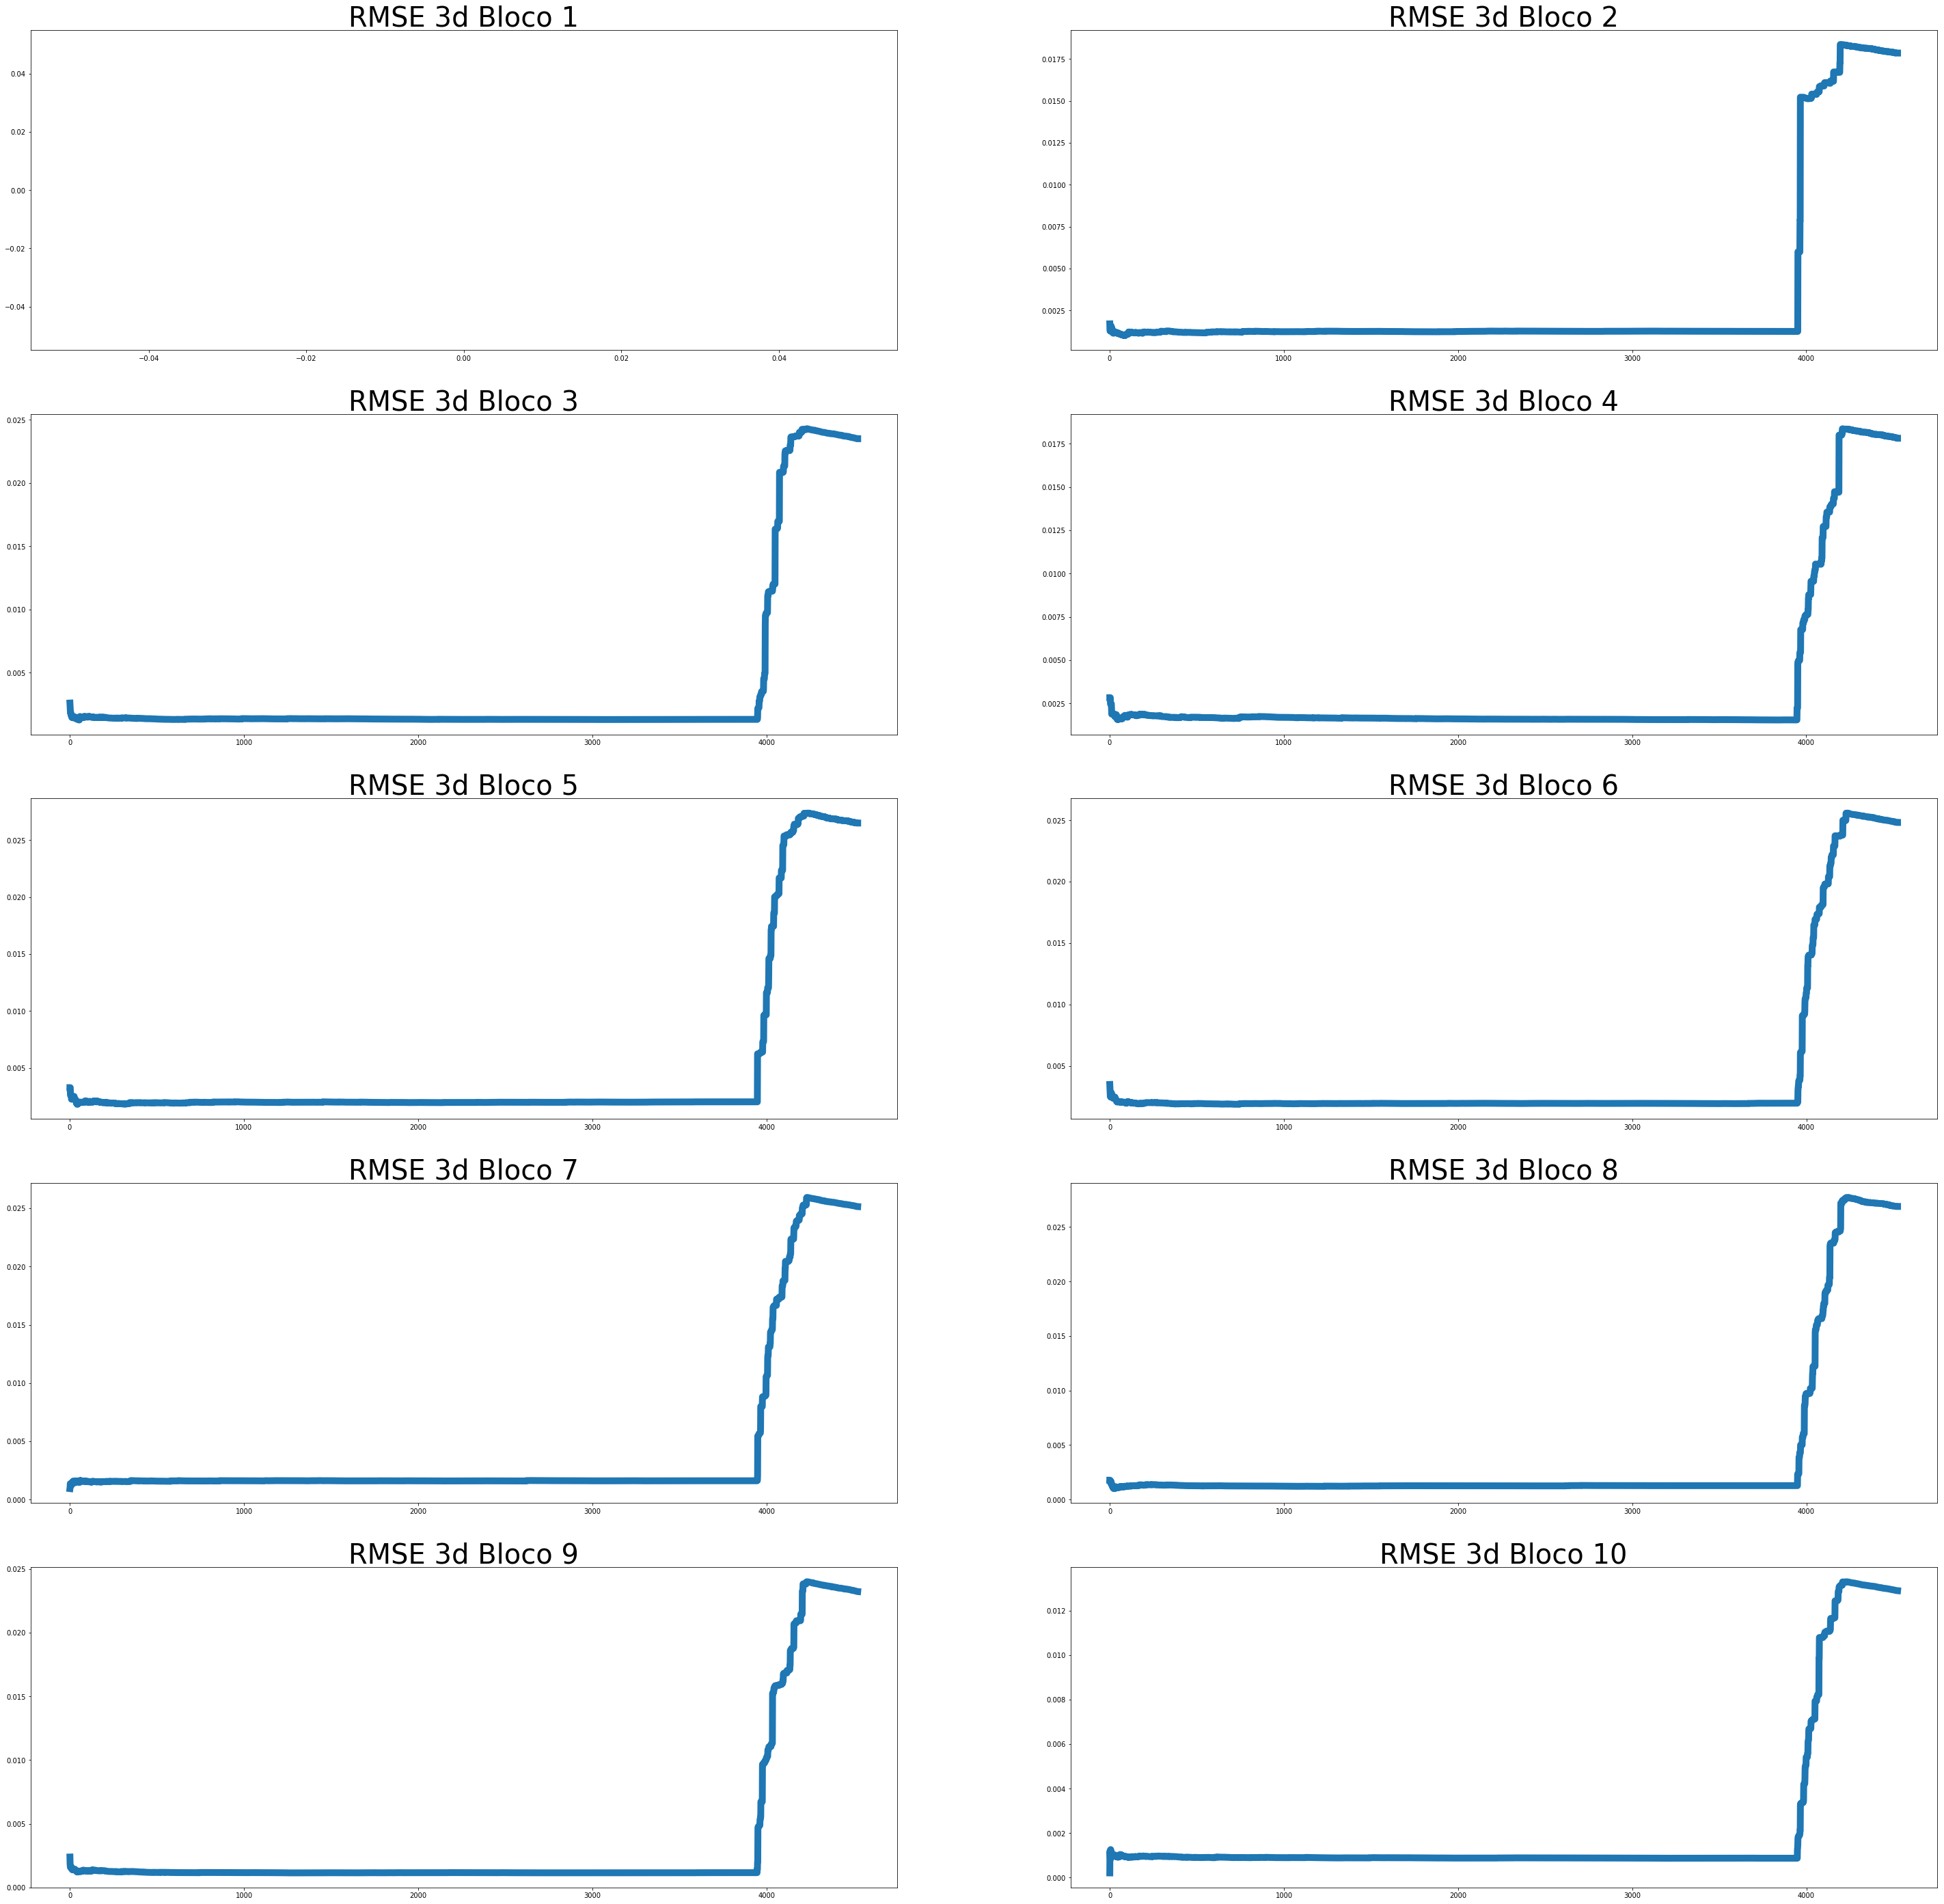

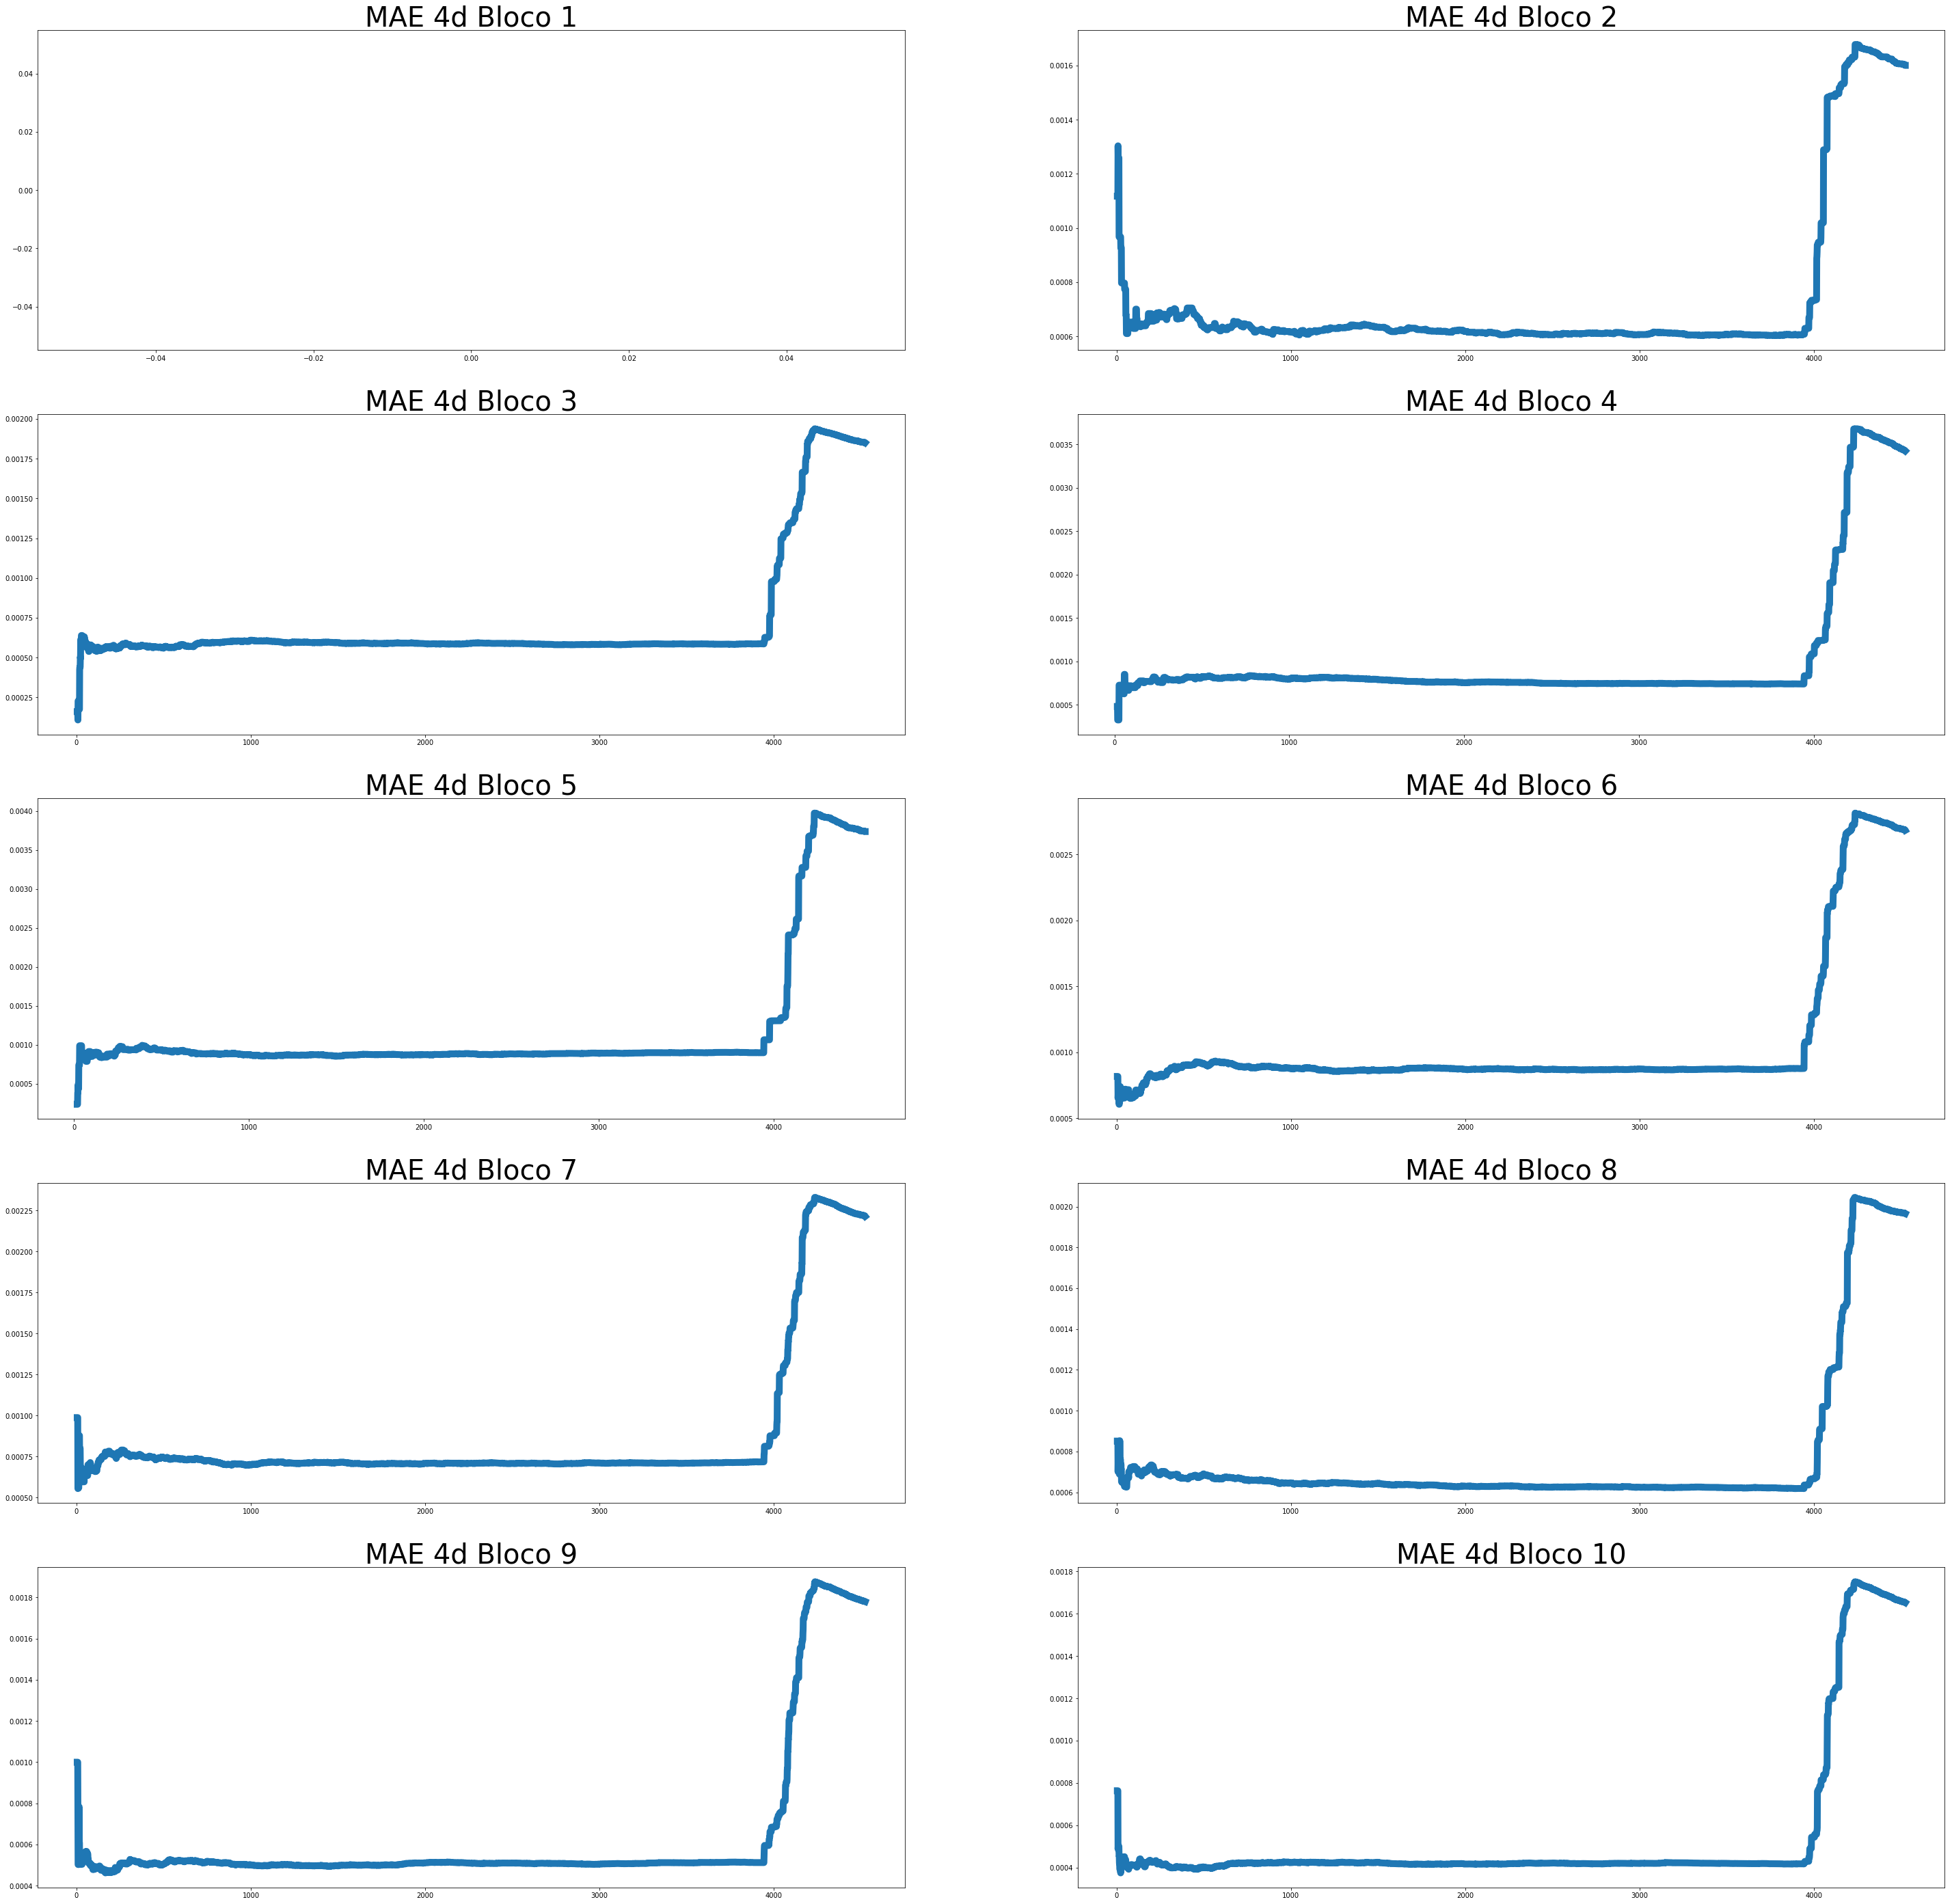

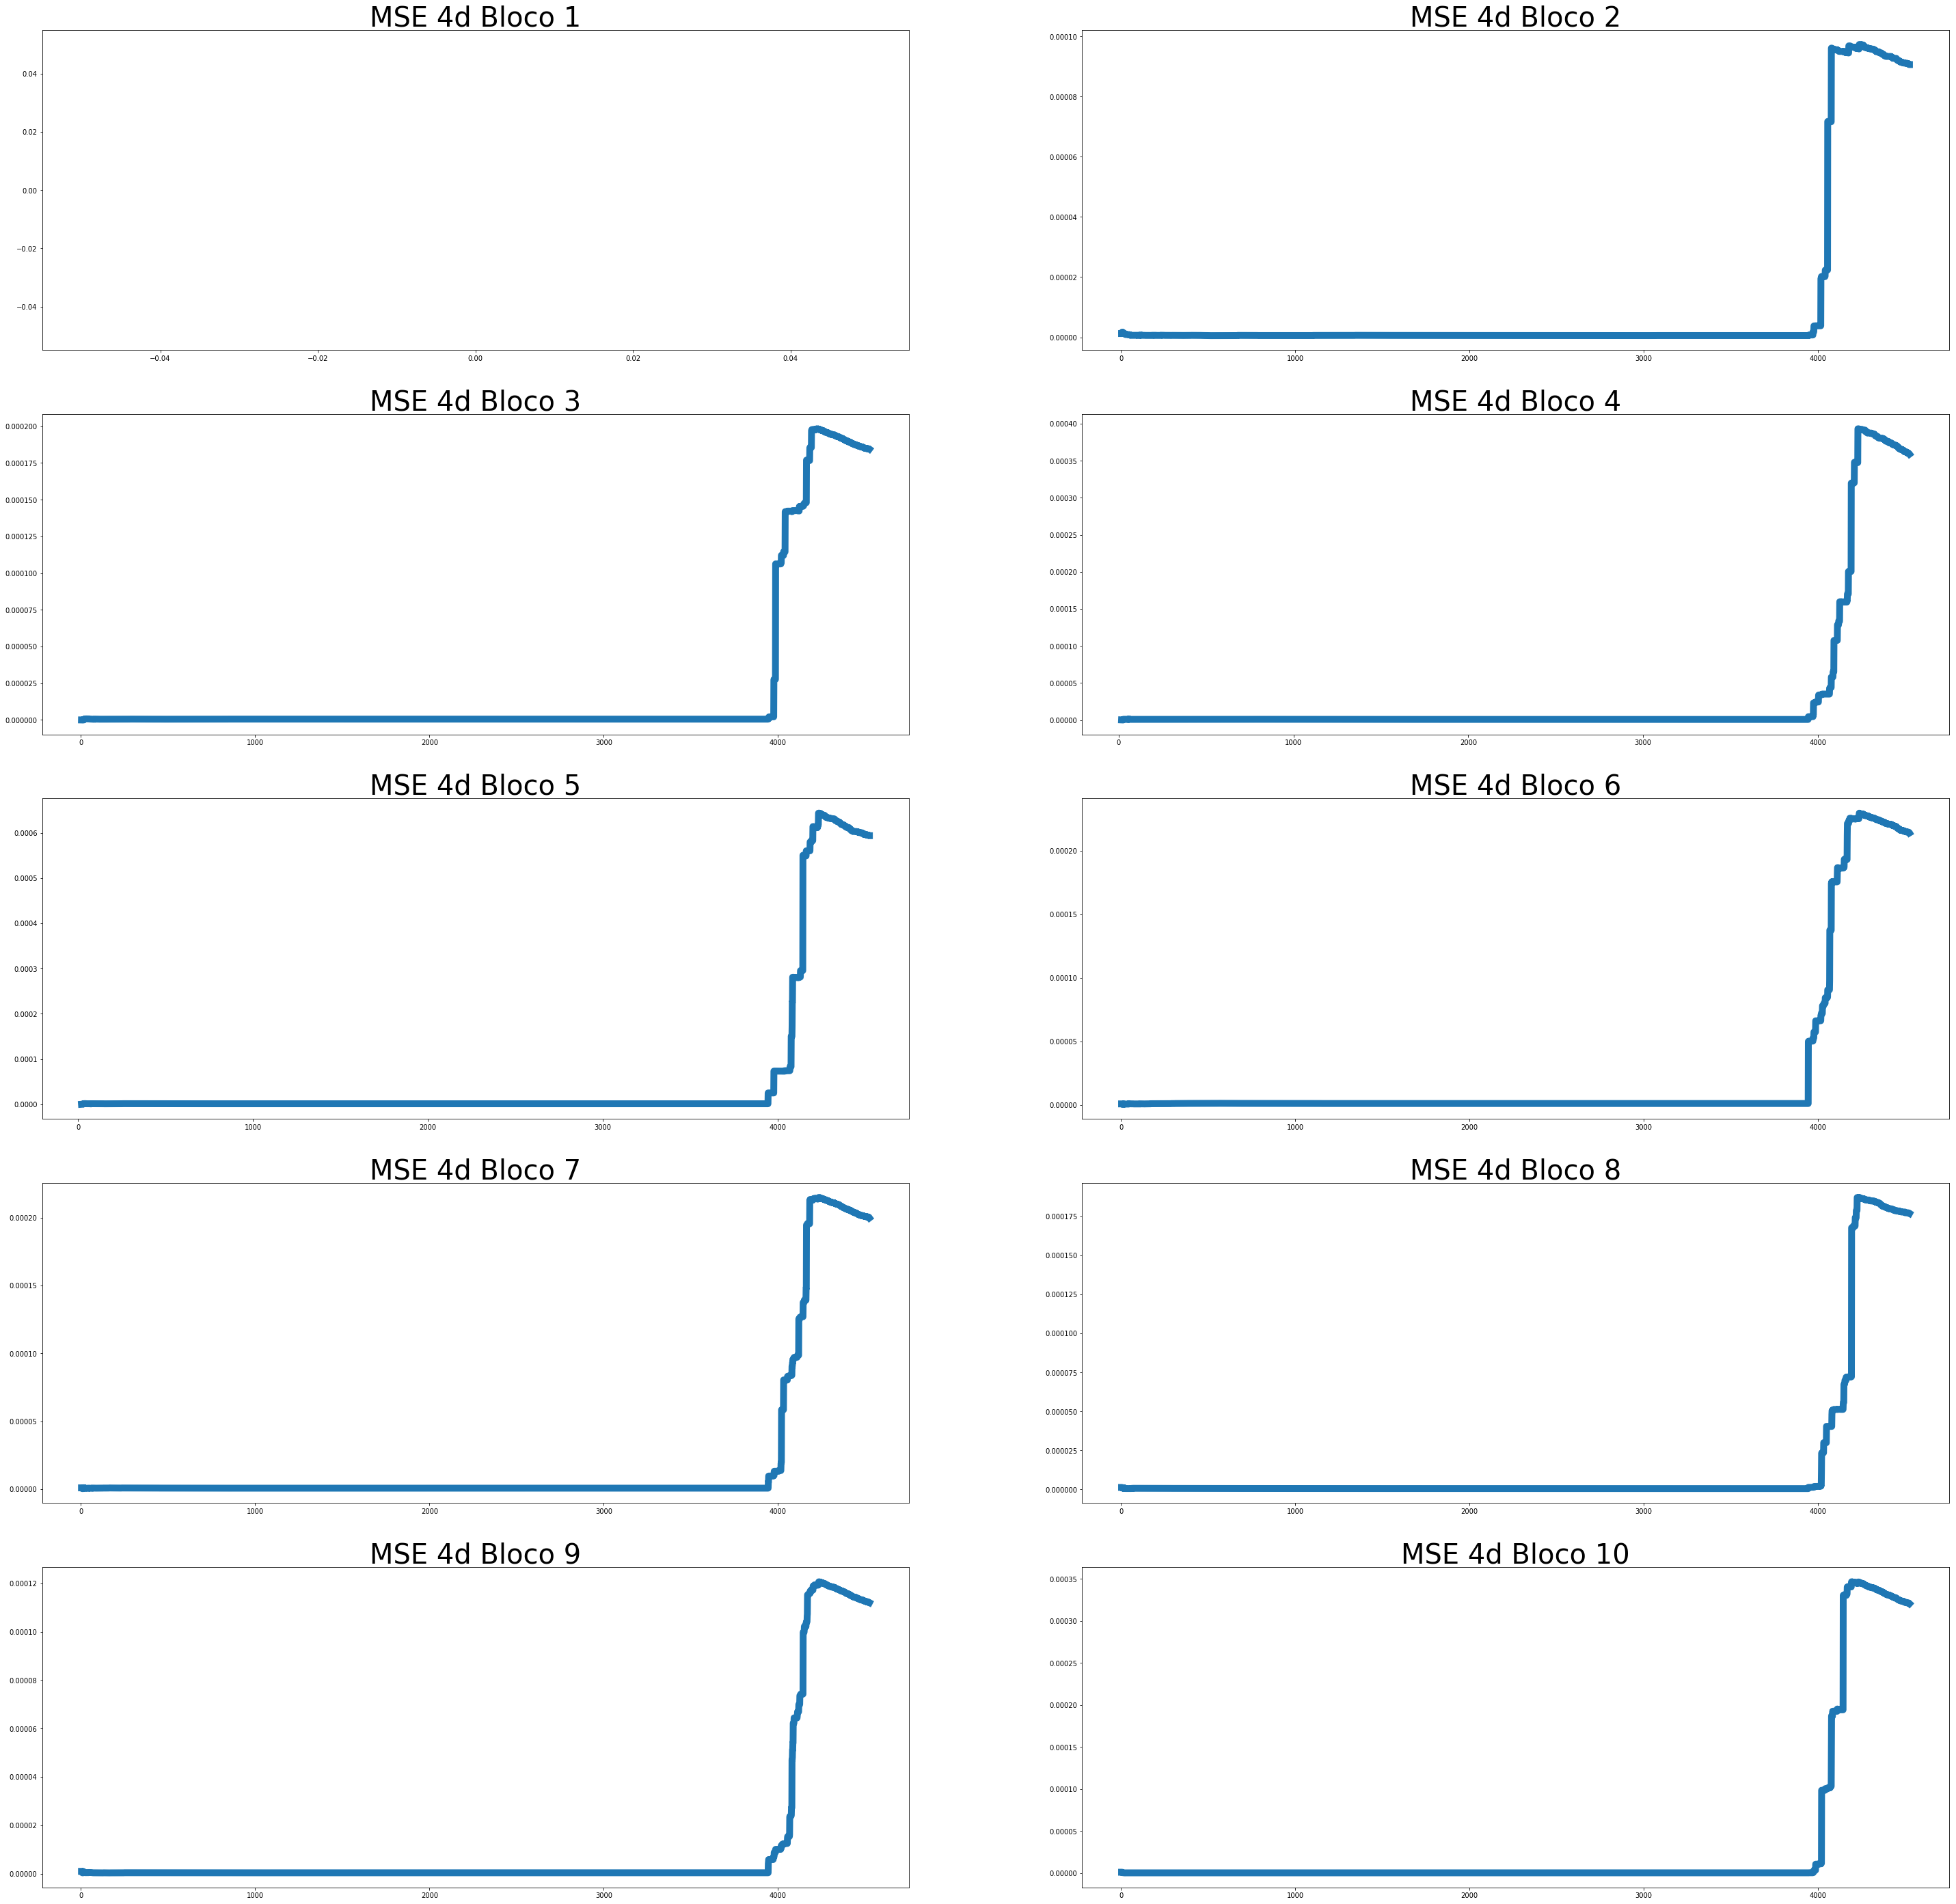

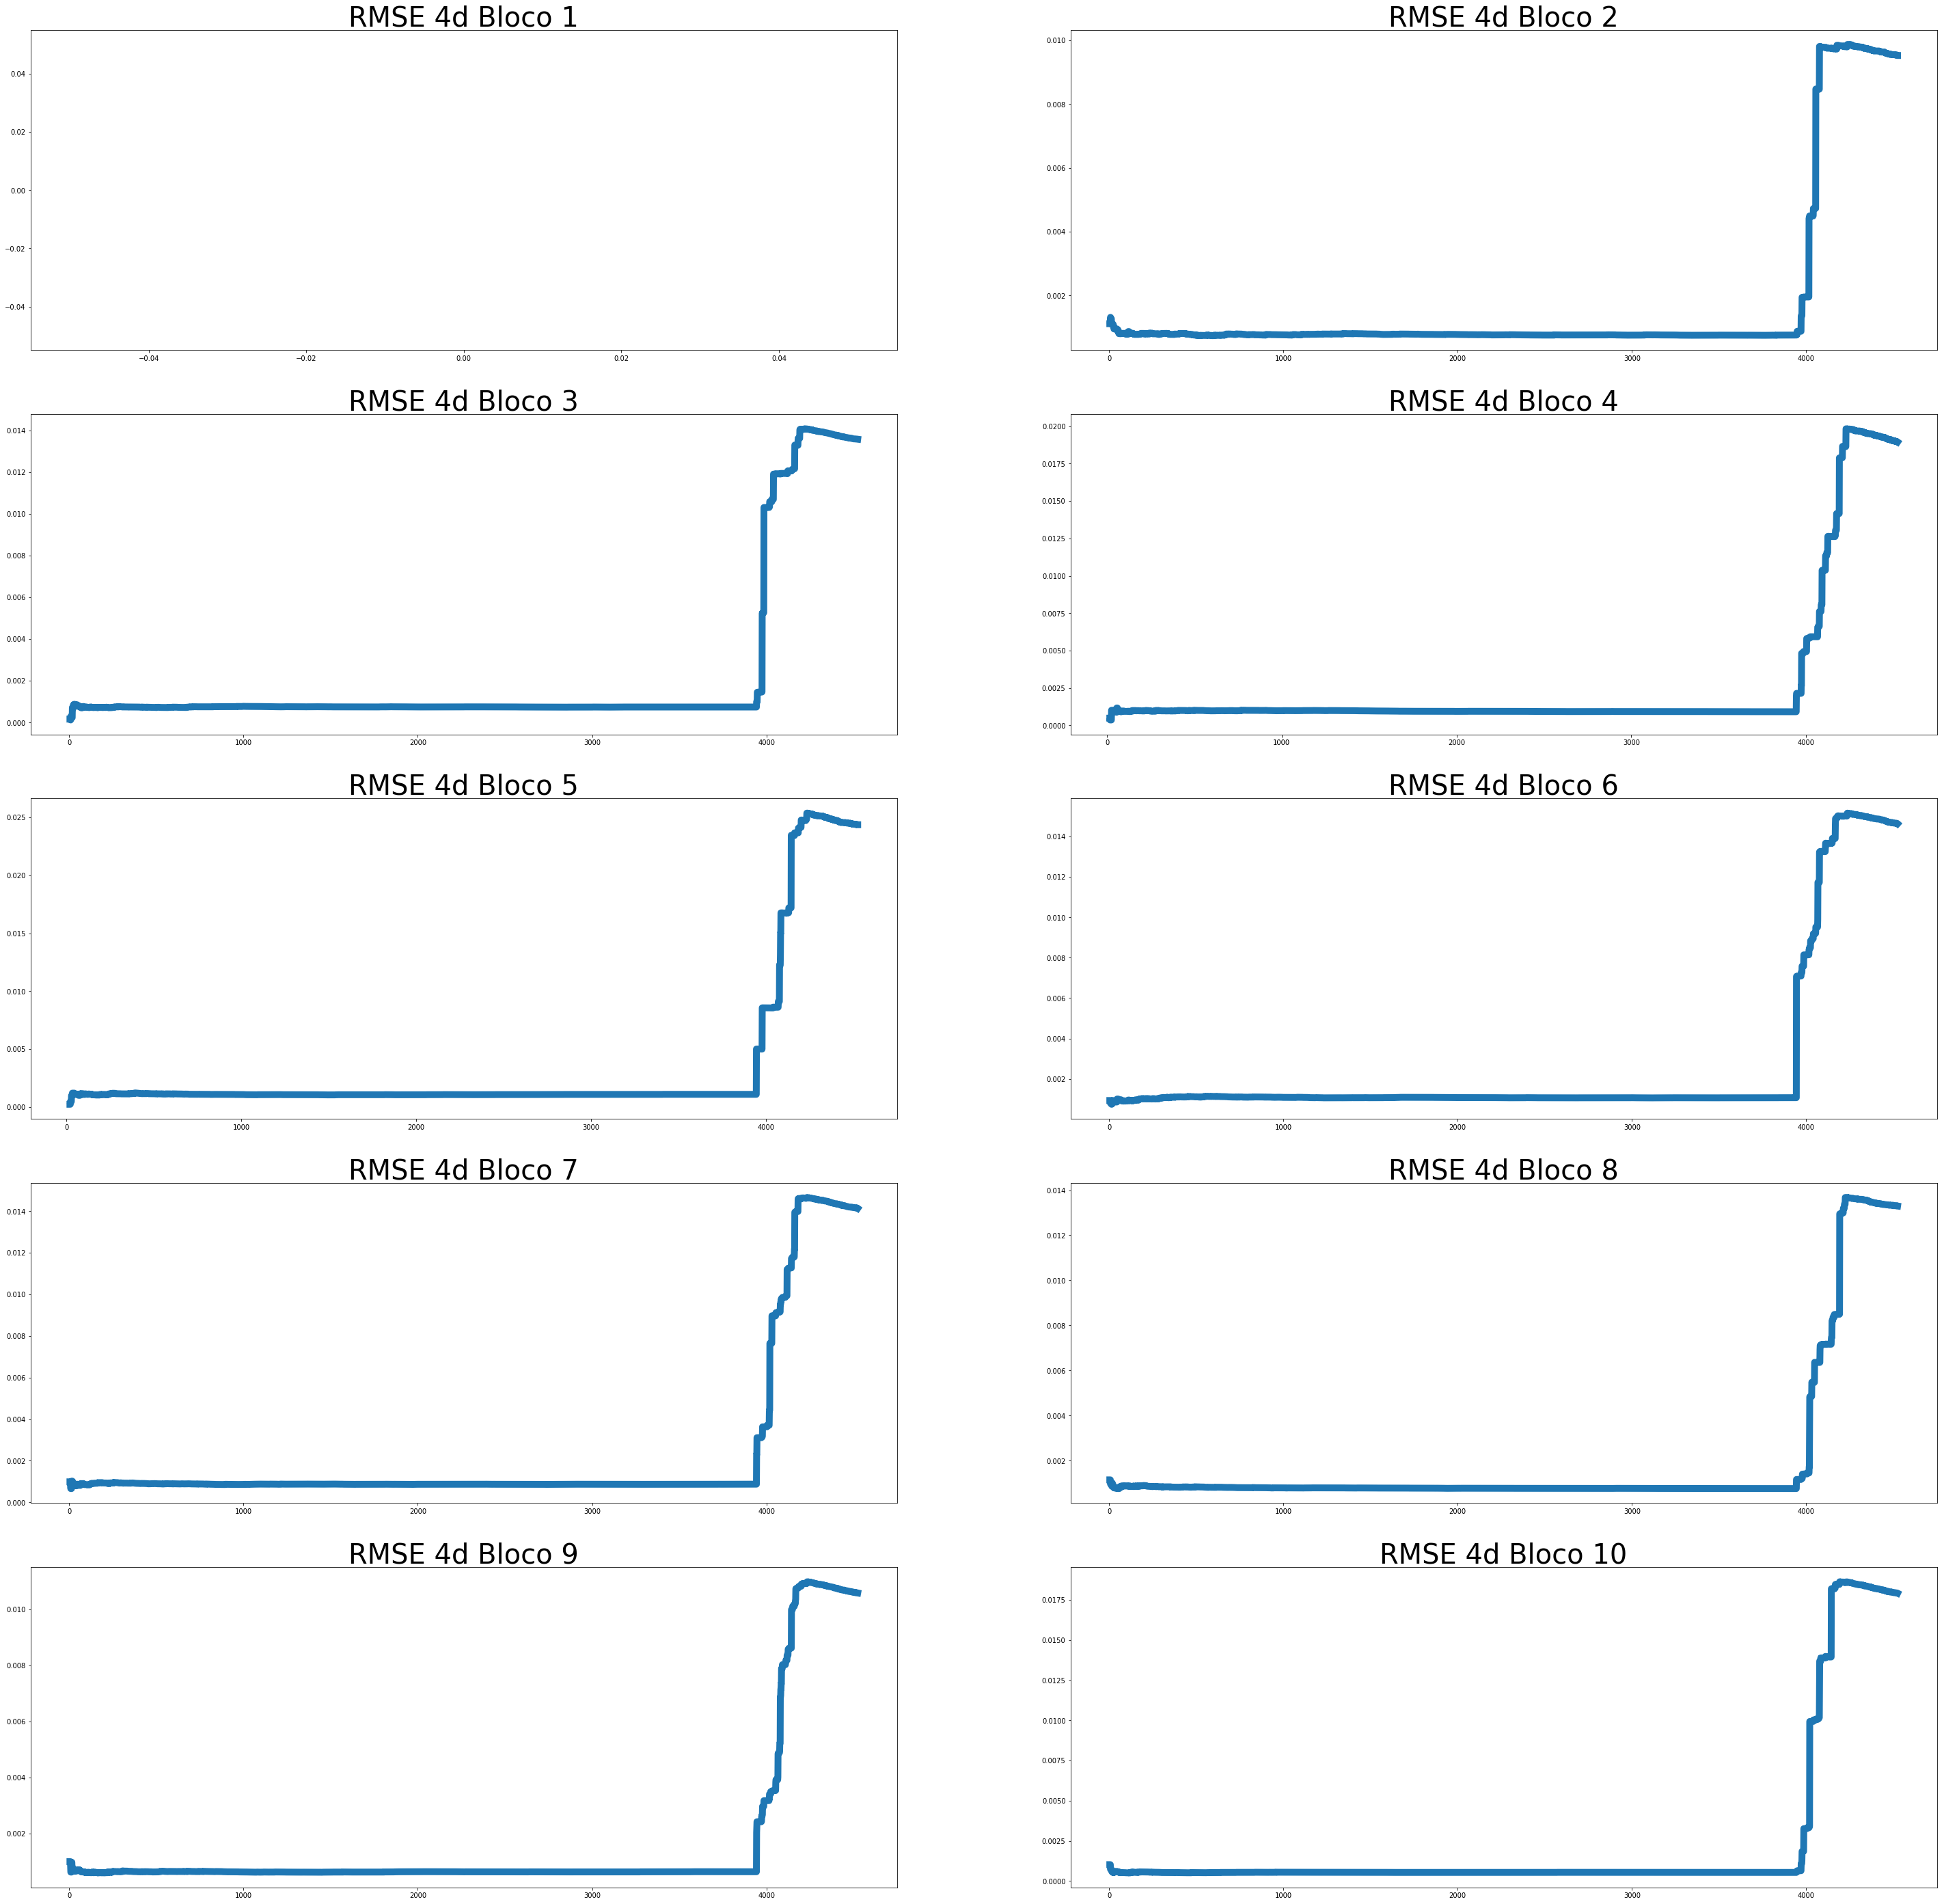

In [11]:
t=np.arange(len(MAE))


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE2Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE3Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE4Dc[:,i],linewidth=10)
plt.show()

ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



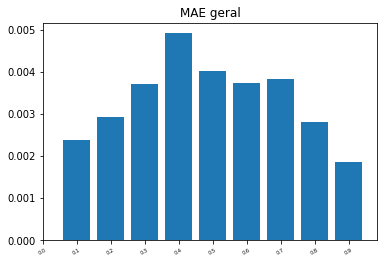

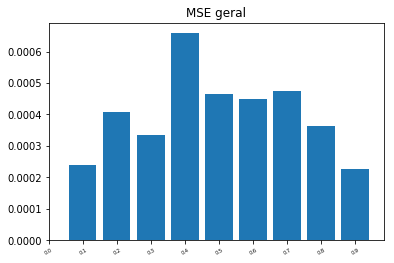

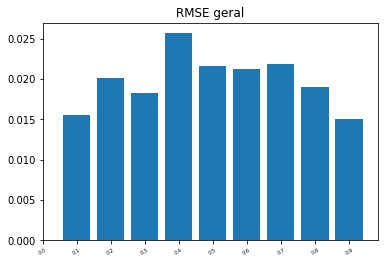


 
 ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL 



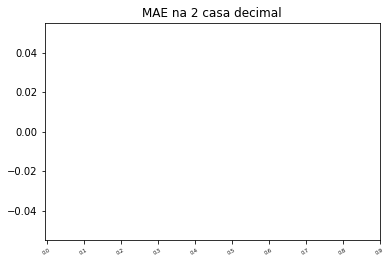

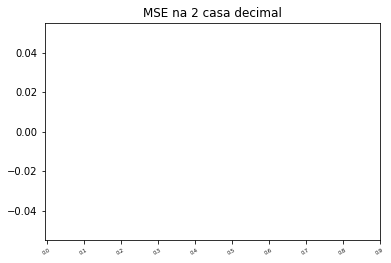

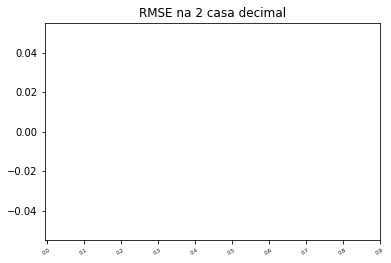


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL 



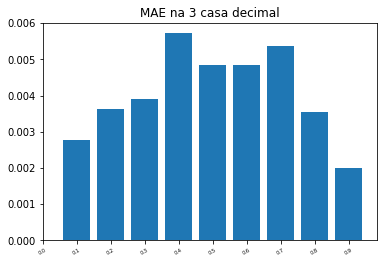

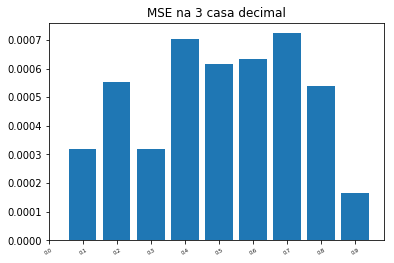

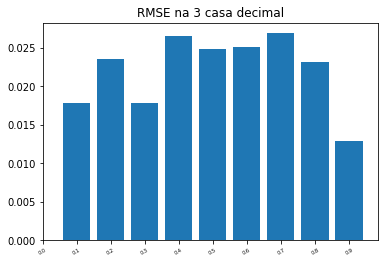


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL 



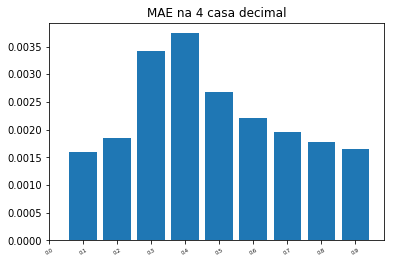

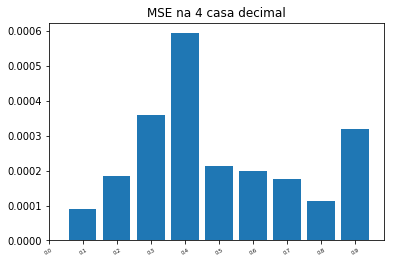

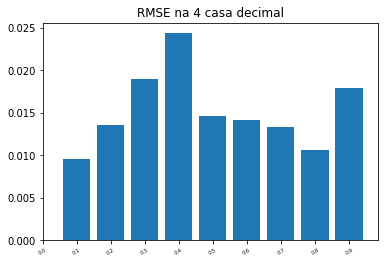

In [16]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[-1]))
plt.bar(index, MAE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[-1]))
plt.bar(index, MSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[-1]))
plt.bar(index, MAE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[-1]))
plt.bar(index, MSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[-1]))
plt.bar(index, MAE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[-1]))
plt.bar(index, MSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[-1]))
plt.bar(index, RMSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[-1]))
plt.bar(index, MAE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[-1]))
plt.bar(index, MSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[-1]))
plt.bar(index, RMSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()


ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



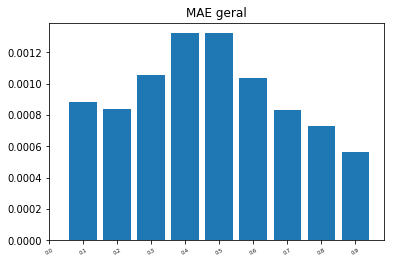

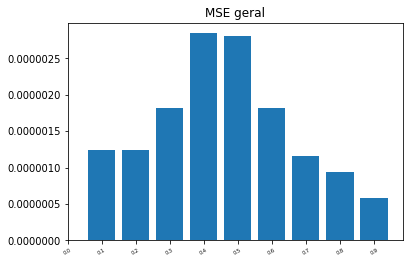

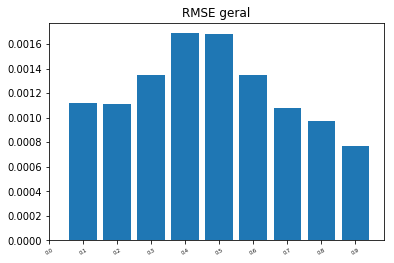


 
 ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL 



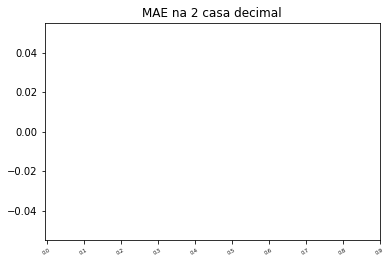

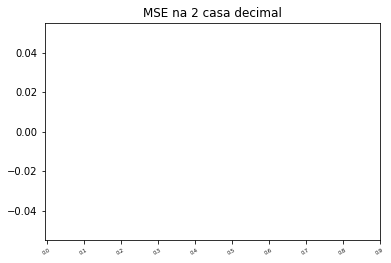

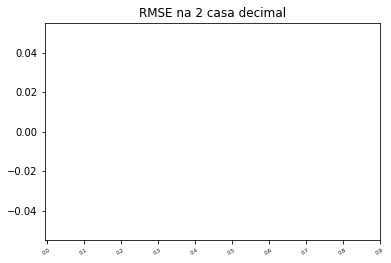


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL 



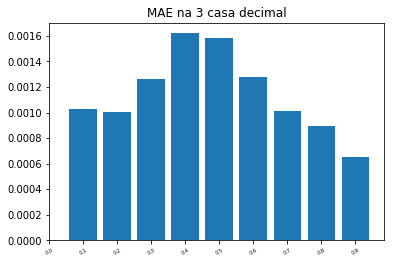

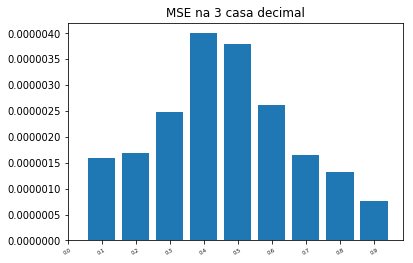

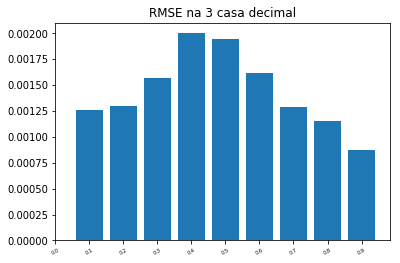


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL 



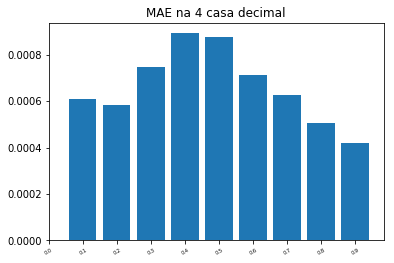

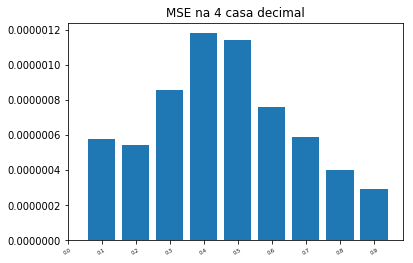

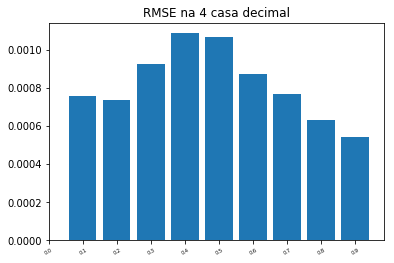

In [17]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[3000]))
plt.bar(index, MAE[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[3000]))
plt.bar(index, MSE[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[3000]))
plt.bar(index, RMSE[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[3000]))
plt.bar(index, MAE2D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[3000]))
plt.bar(index, MSE2D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[3000]))
plt.bar(index, RMSE2D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[3000]))
plt.bar(index, MAE3D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[3000]))
plt.bar(index, MSE3D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[3000]))
plt.bar(index, RMSE3D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[3000]))
plt.bar(index, MAE4D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[3000]))
plt.bar(index, MSE4D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[3000]))
plt.bar(index, RMSE4D[3000])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()
